In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

plt.rcParams["figure.figsize"] = (50,10) 

In [423]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00


In [424]:
from pmdarima.arima import auto_arima

In [399]:
df_train = pd.read_csv('/content/drive/MyDrive/GEF2012-wind-forecasting/train.csv')

In [400]:
df_train.head()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7
0,2009070100,0.045,0.233,0.494,0.105,0.056,0.118,0.051
1,2009070101,0.085,0.249,0.257,0.105,0.066,0.066,0.051
2,2009070102,0.020,0.175,0.178,0.033,0.015,0.026,0.000
3,2009070103,0.060,0.085,0.109,0.022,0.010,0.013,0.000
4,2009070104,0.045,0.032,0.079,0.039,0.010,0.000,0.000


In [401]:
df_train["date"] = pd.to_datetime(df_train['date'], format = "%Y%M%d%H")

In [402]:
df_train = df_train.set_index('date')

In [403]:
df_train.tail()

,wp1,wp2,wp3,wp4,wp5,wp6,wp7
date,,,,,,,
2012-01-26 08:06:00,0.170,0.138,0.119,0.149,0.339,0.132,0.101
2012-01-26 09:06:00,0.211,0.106,0.208,0.193,0.359,0.132,0.076
2012-01-26 10:06:00,0.251,0.090,0.247,0.132,0.329,0.132,0.076
2012-01-26 11:06:00,0.301,0.058,0.356,0.061,0.293,0.105,0.076
2012-01-26 12:06:00,0.226,0.069,0.227,0.011,0.329,0.079,0.000


In [381]:
df_test = pd.read_csv('/content/drive/MyDrive/GEF2012-wind-forecasting/test.csv')
df_test["date"] = pd.to_datetime(df_test['date'], format = "%Y%M%d%H")
df_test = df_test.set_index('date')
df_test = df_test.resample('D').mean()

In [385]:
df_test.head()

,id
date,
2011-01-01,2227.285714
2011-01-02,1944.628272
2011-01-03,2592.635294
2011-01-04,2784.045455
2011-01-05,1946.865169


##For wp1

In [129]:
df_1 = df_test['wp1']

In [156]:
df_1_hour = df_1.resample('H').mean()
df_1_hour.fillna(0, inplace = True)

<Axes: xlabel='date'>

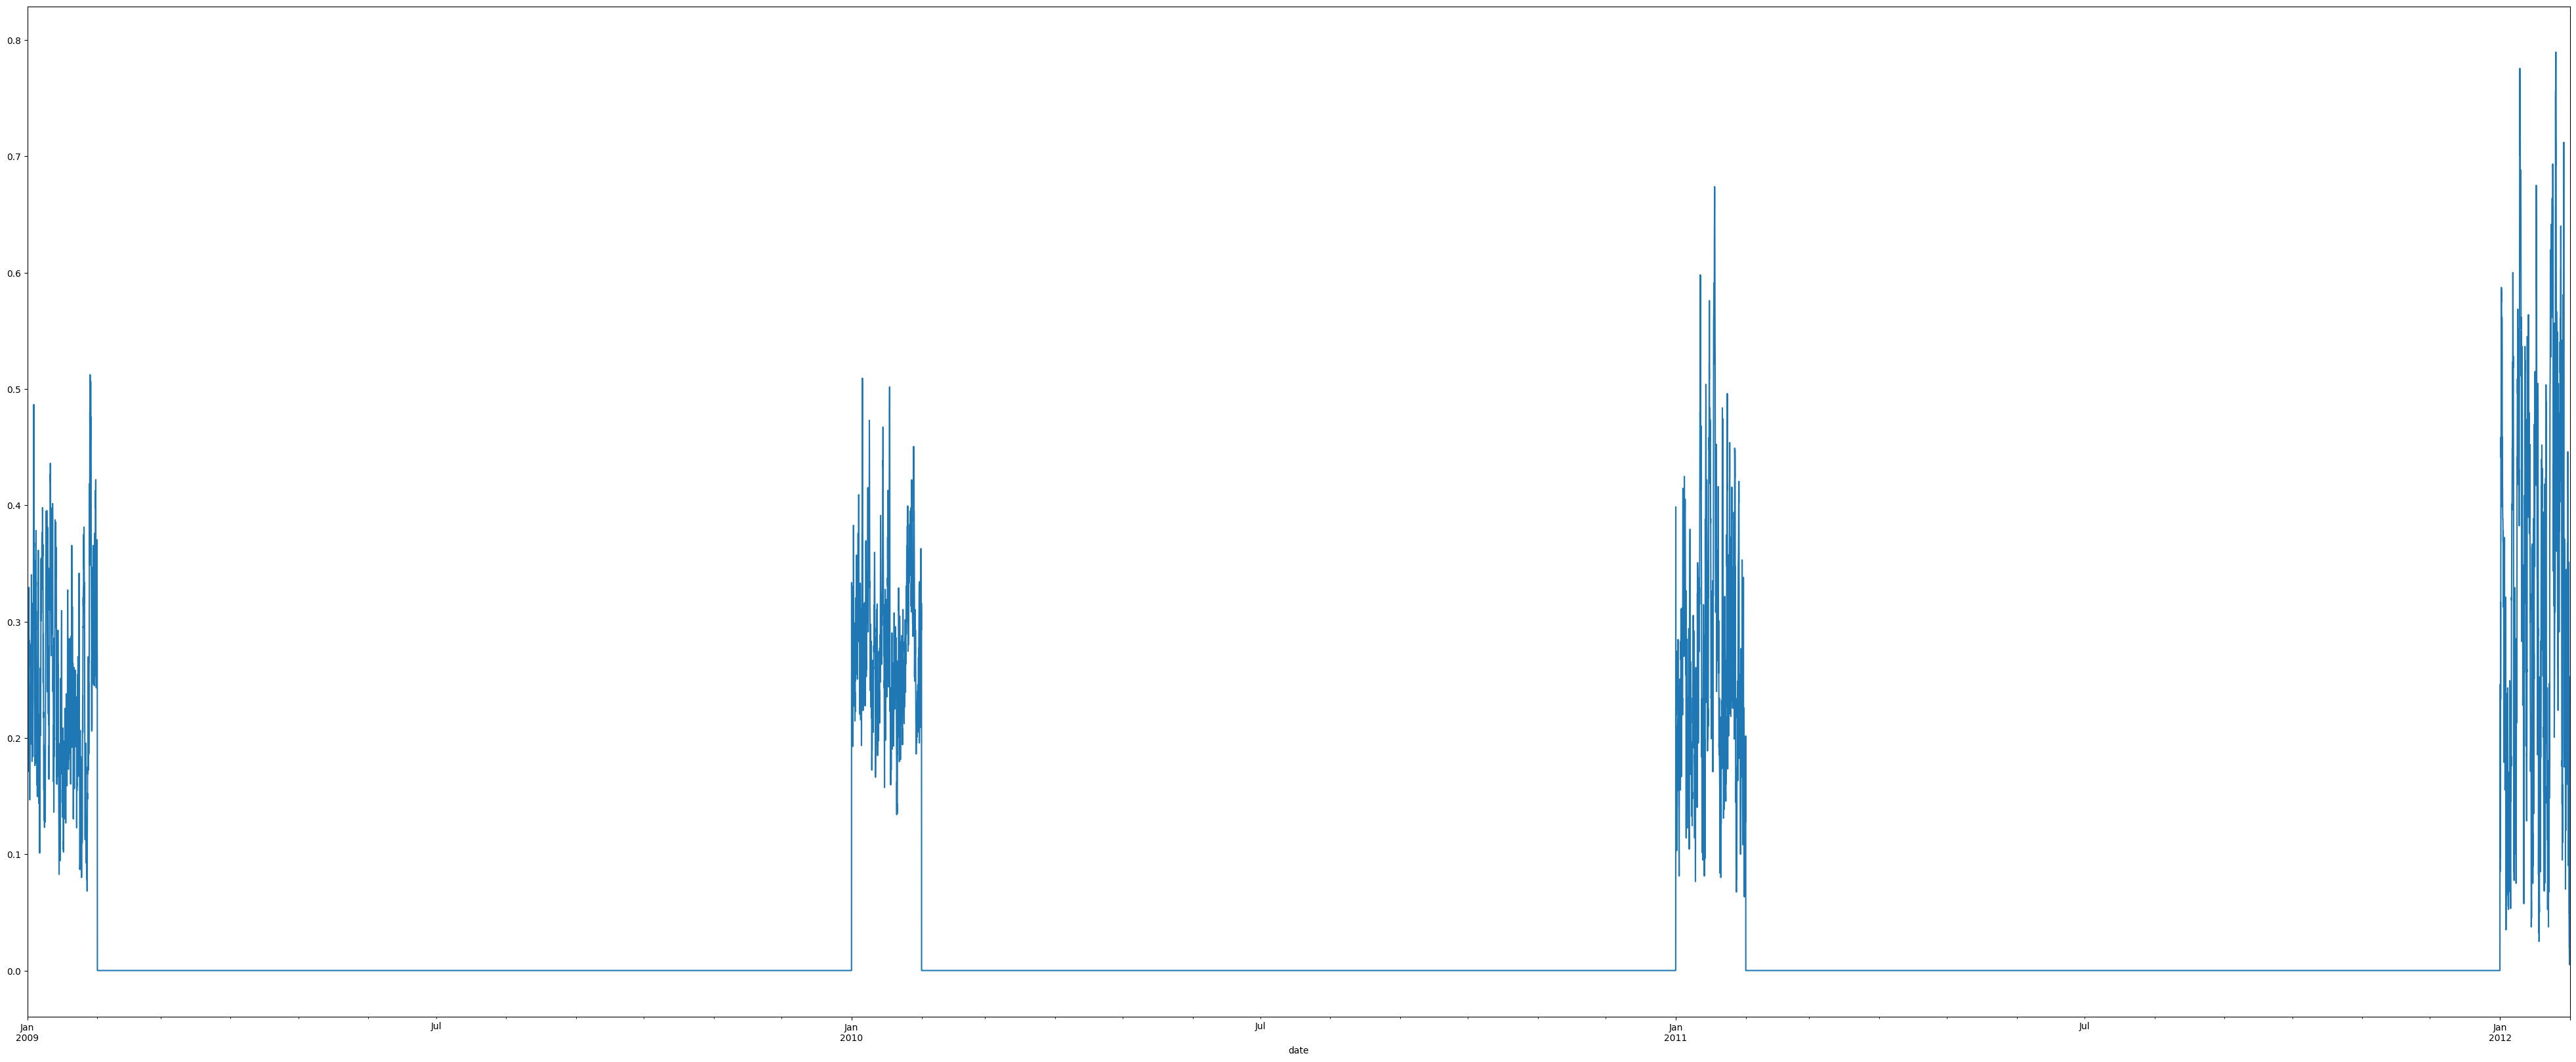

In [157]:
df_1_hour.plot()

In [212]:
df_1_2009 = df_1_hour[:'2009-1']
df_1_2010 = df_1_hour['2010-01-01':'2010-01-31']
df_1_2011 = df_1_hour['2011-01-01':'2011-01-31']
df_1_2012 = df_1_hour['2012-01-01':'2012-01-31']

<Axes: xlabel='date'>

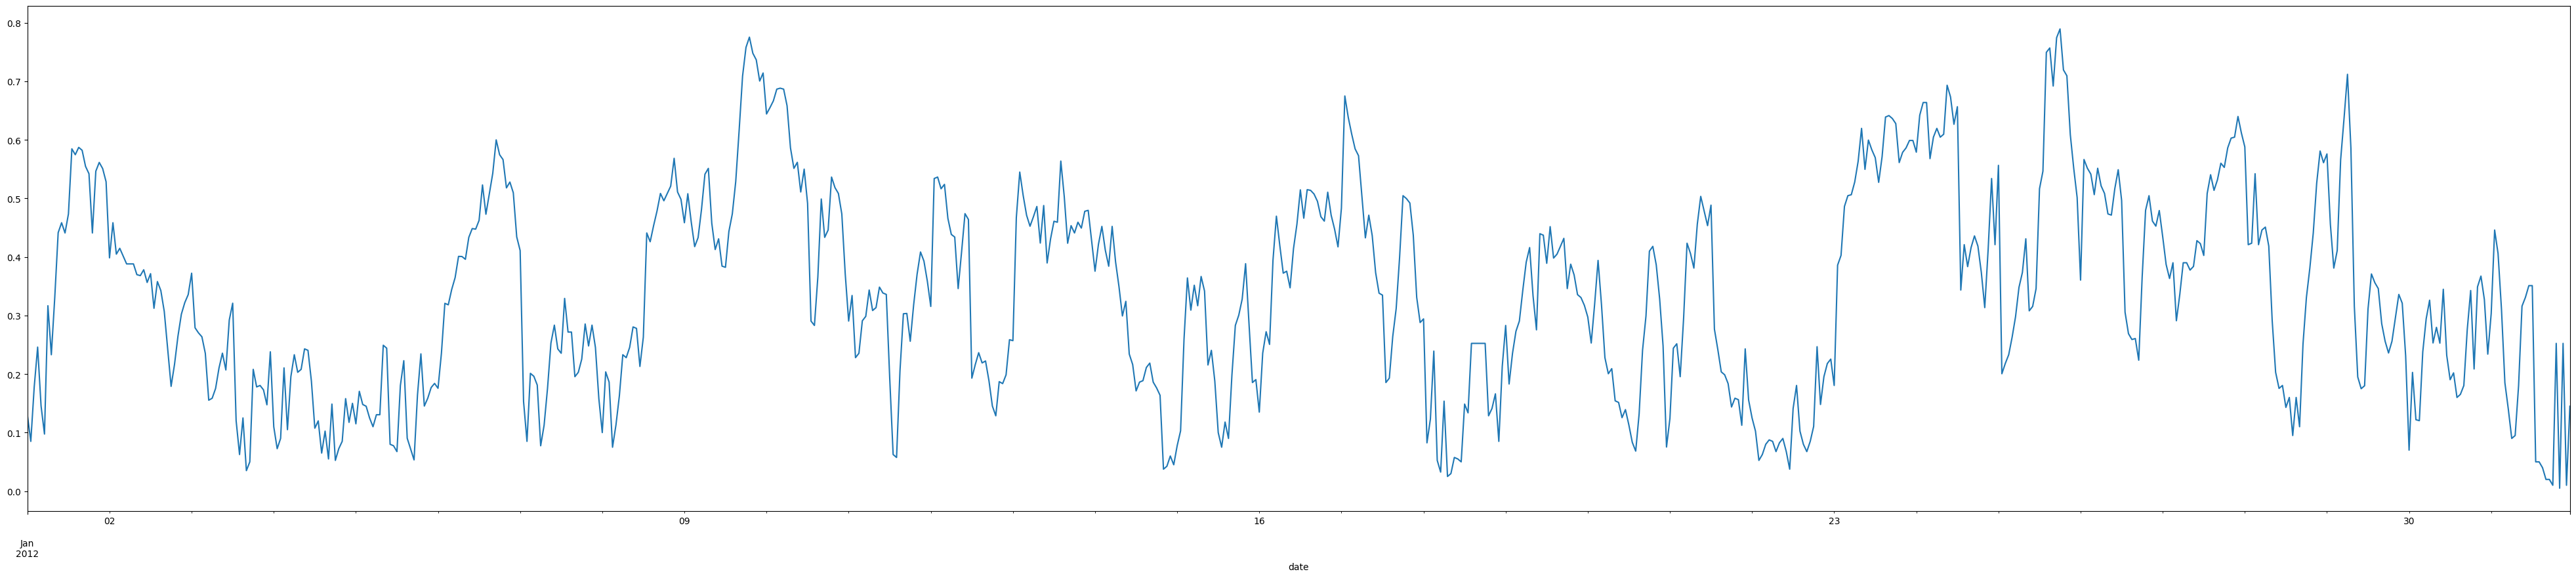

In [213]:
df_1_2012.plot()

Now this data seems to be usable

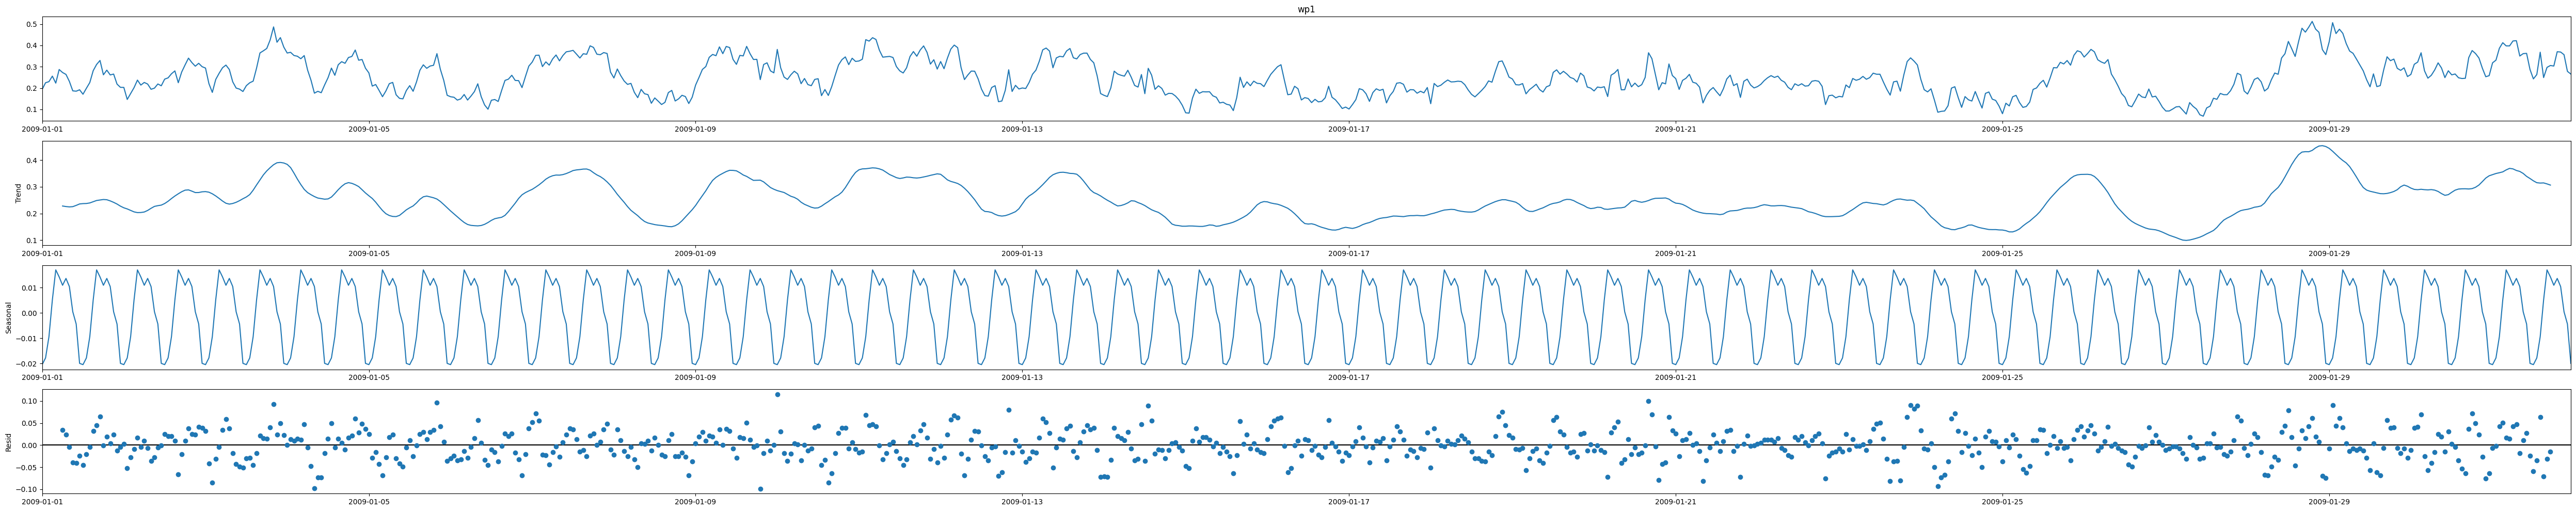

In [210]:
decomposition = seasonal_decompose(df_1_1, period = 12, model = 'additive')
figure = decomposition.plot()
plt.show()

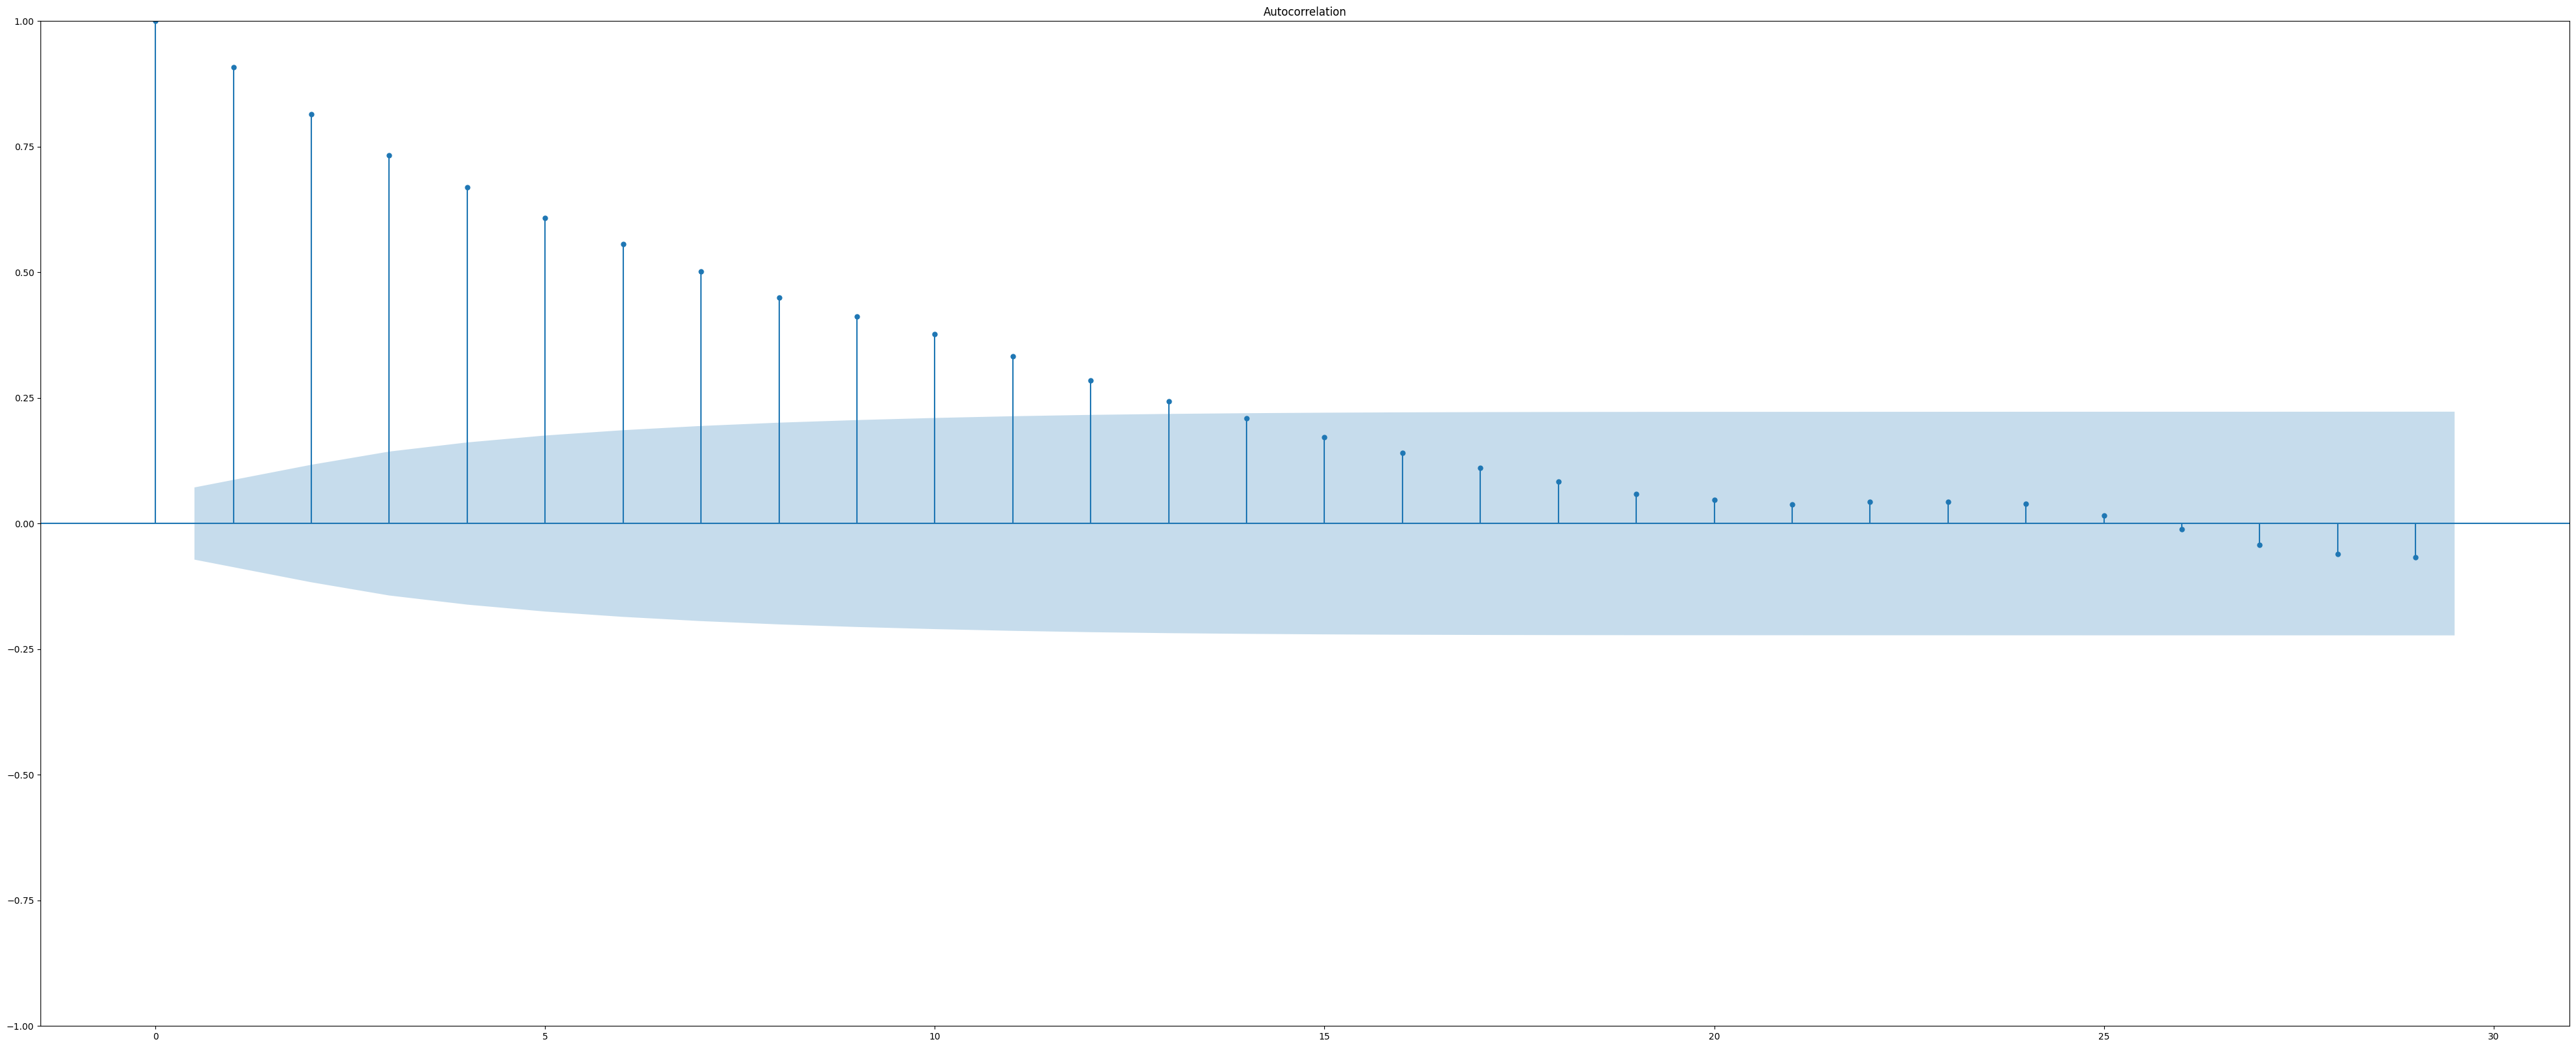

In [173]:
plot_acf(df_1_2009)
print()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


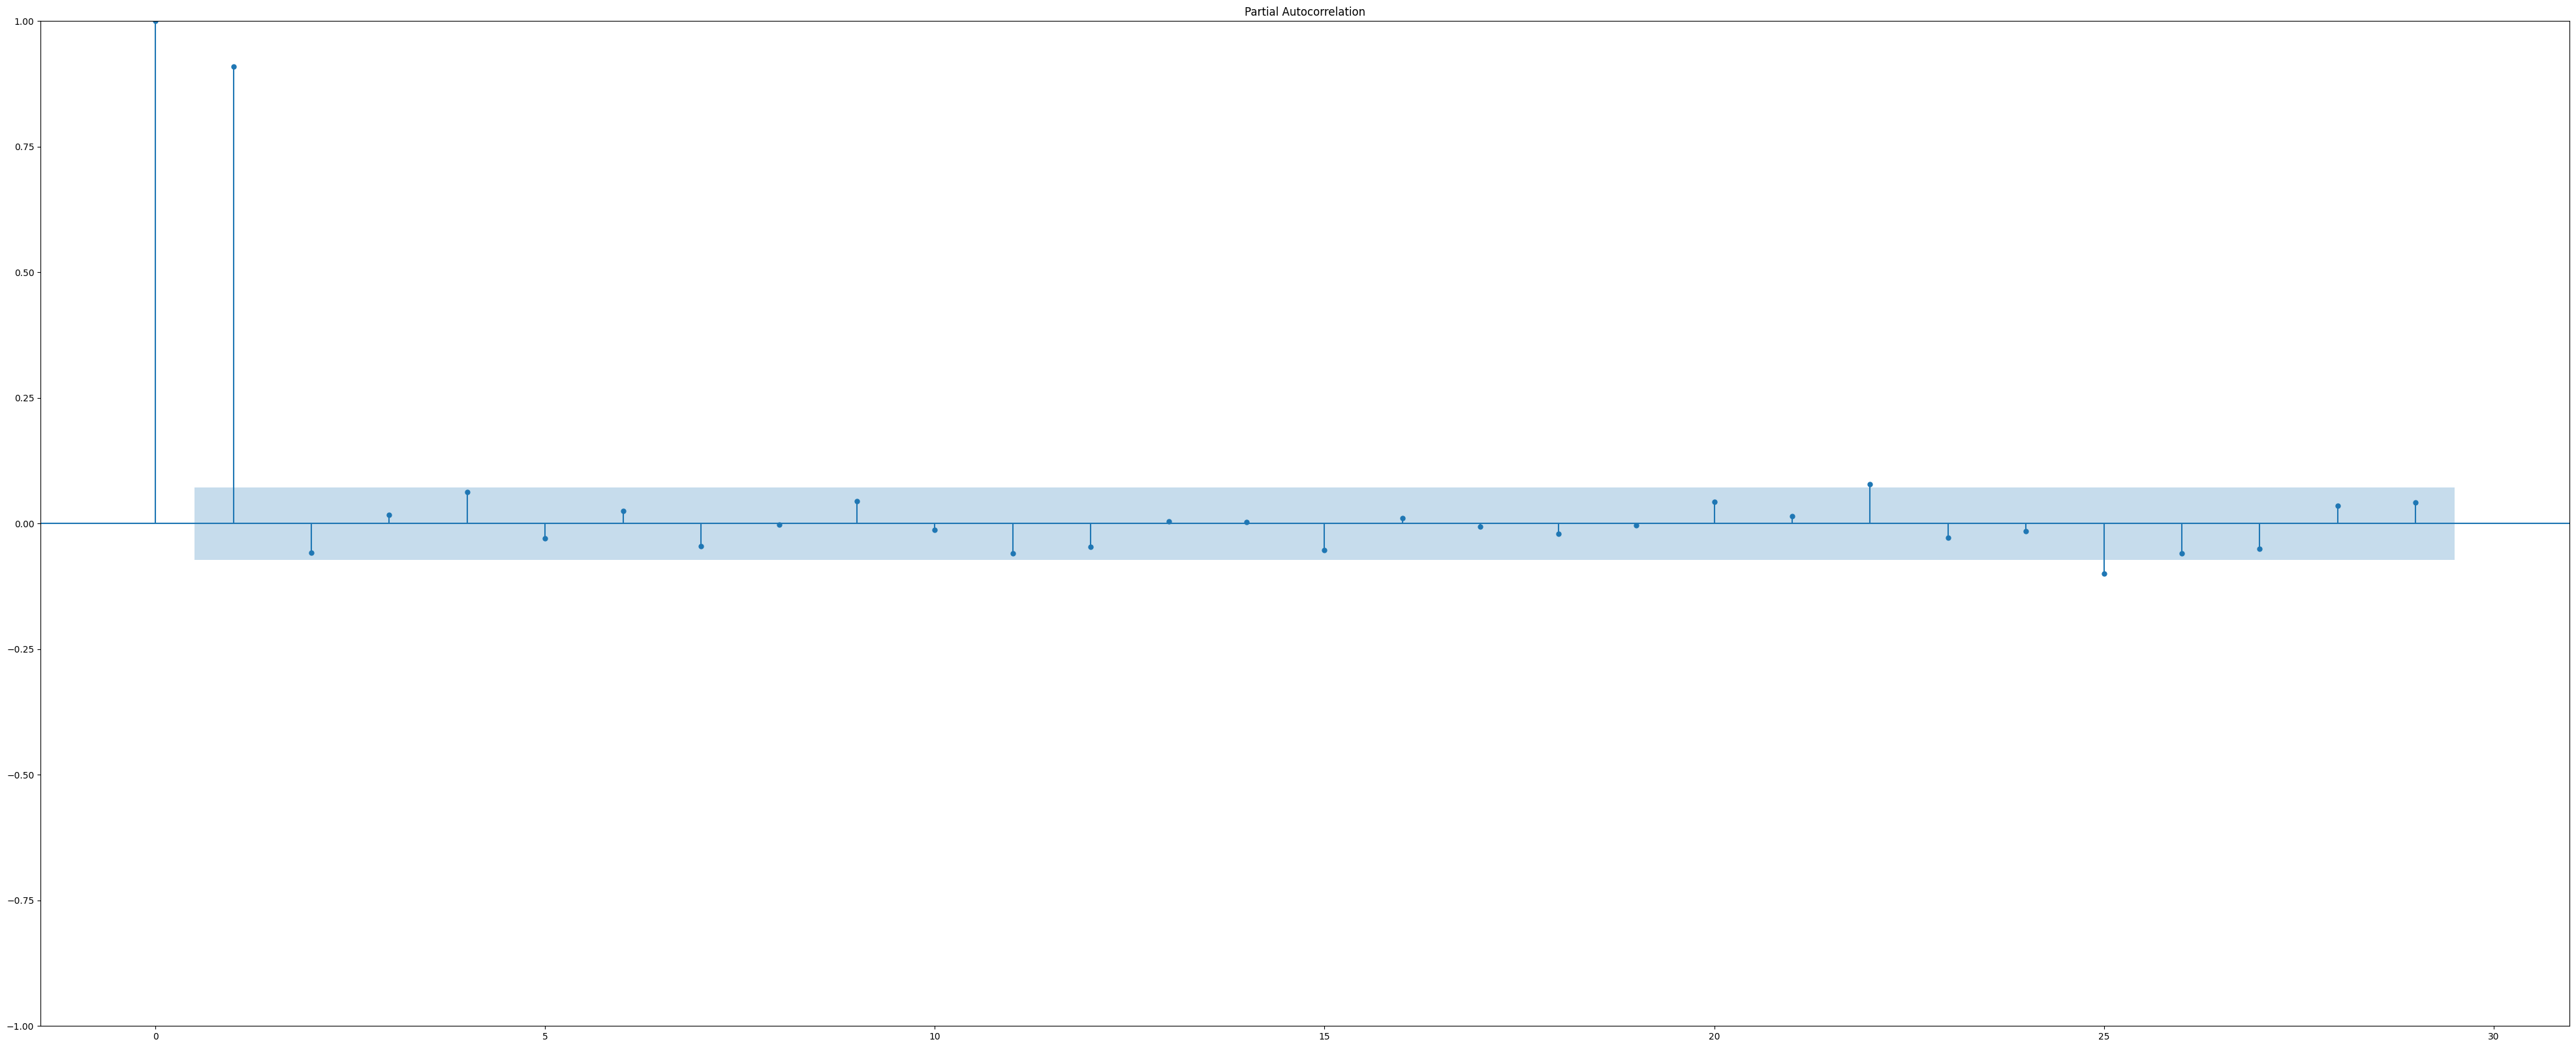

In [175]:
plot_pacf(df_1_2009)
print()

So,from here  we can see that the AR(1) can be a good fit

In [177]:
#let us use the adfuller test
result = adfuller(df_1_2009)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.180180
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


So, we can say that our series is stationary

In [198]:
model1 = ARIMA(df_1_2009,order = (1,0,0)).fit()

In [199]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    wp1   No. Observations:                  744
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1433.389
Date:                Sun, 28 May 2023   AIC                          -2860.777
Time:                        18:13:32   BIC                          -2846.941
Sample:                    01-01-2009   HQIC                         -2855.444
                         - 01-31-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2474      0.014     17.512      0.000       0.220       0.275
ar.L1          0.9079      0.016     57.407      0.000       0.877       0.939
sigma2         0.0012   5.97e-05     20.735      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   2.12   Jarque-Bera (JB):                 5.68
Prob(Q):                              0.15   Prob(JB):                         0.06
Heteroskedasticity (H):               1.11   Skew:                             0.12
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [266]:
model2 = ARIMA(df_1_2010,order = (1,0,0)).fit()
model3 = ARIMA(df_1_2011,order = (1,0,0)).fit()
model4 = ARIMA(df_1_2012,order = (1,0,0)).fit()

In [302]:
df_pred = pd.DataFrame(df_test.index)

In [303]:
df_pred

,date
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
391,2012-01-27
392,2012-01-28
393,2012-01-29
394,2012-01-30


In [362]:
def predict (d):
  if d.month > 1 :
    return 0
  else:
    if d.year <= 2011:
      return model3.predict(d).mean()
    else:
      return model4.predict(d).mean()

In [369]:
pred = [predict(date) for date in df_pred['date'].to_list()]

In [370]:
df_pred['wp1'] = pd.Series(pred)

##For Wp2

In [379]:
df_2 = df_train['wp2']
df_2_hour = df_2.resample('H').mean()
df_2_hour.fillna(0, inplace = True)

<Axes: xlabel='date'>

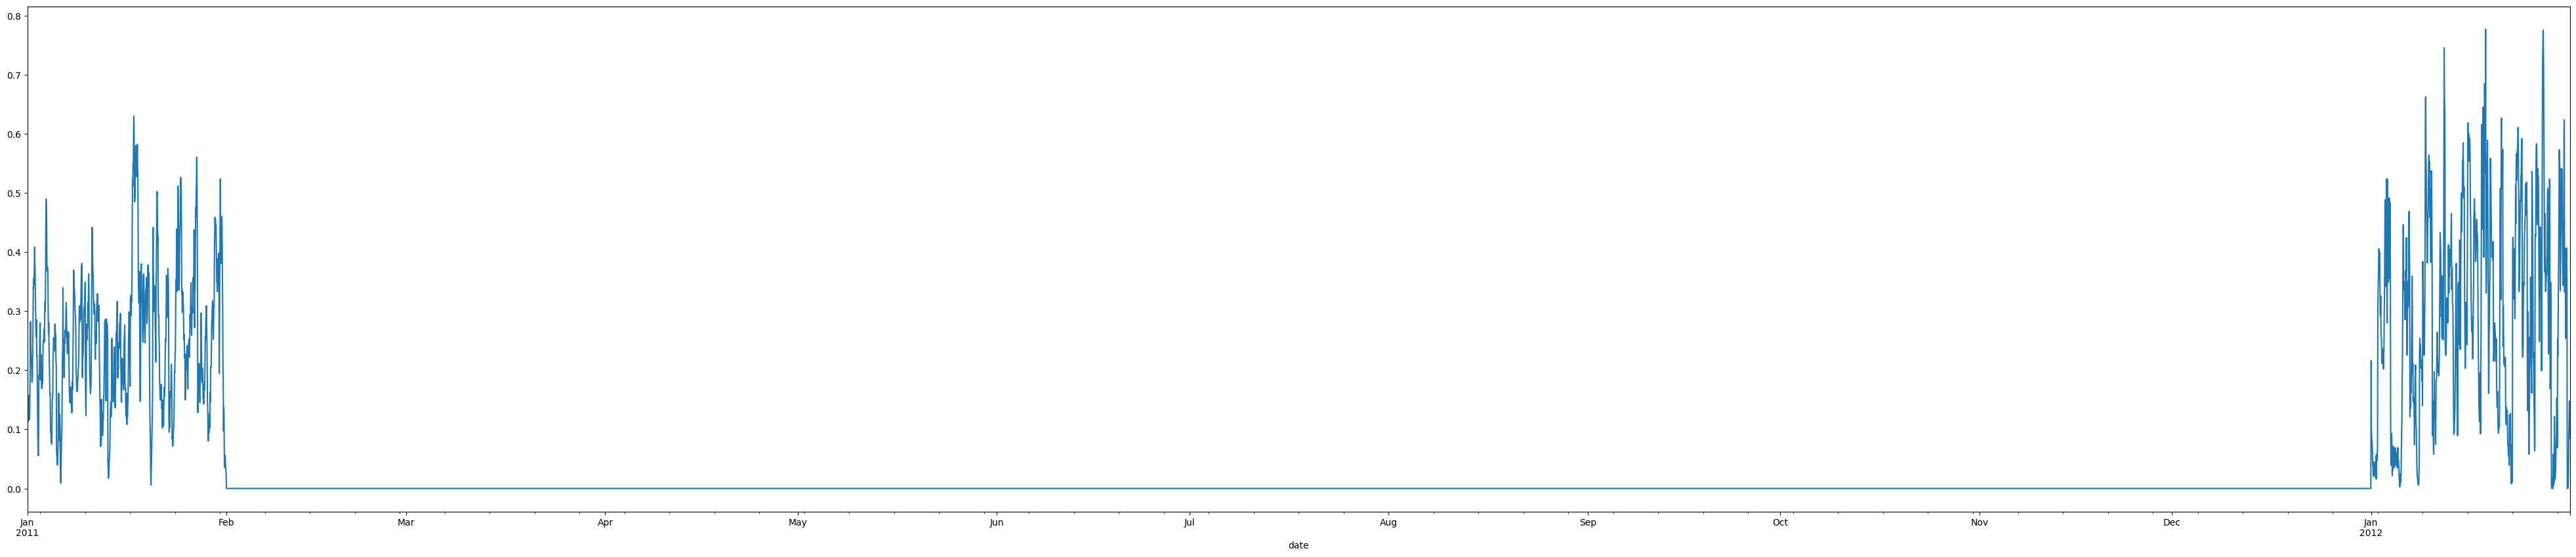

In [405]:
df_2_hour[df_2_hour.index >= '2011'].plot()

In [383]:
df_2_2011 = df_2_hour['2011-01-01':'2011-01-31']
df_2_2012 = df_2_hour['2012-01-01':'2012-01-31']

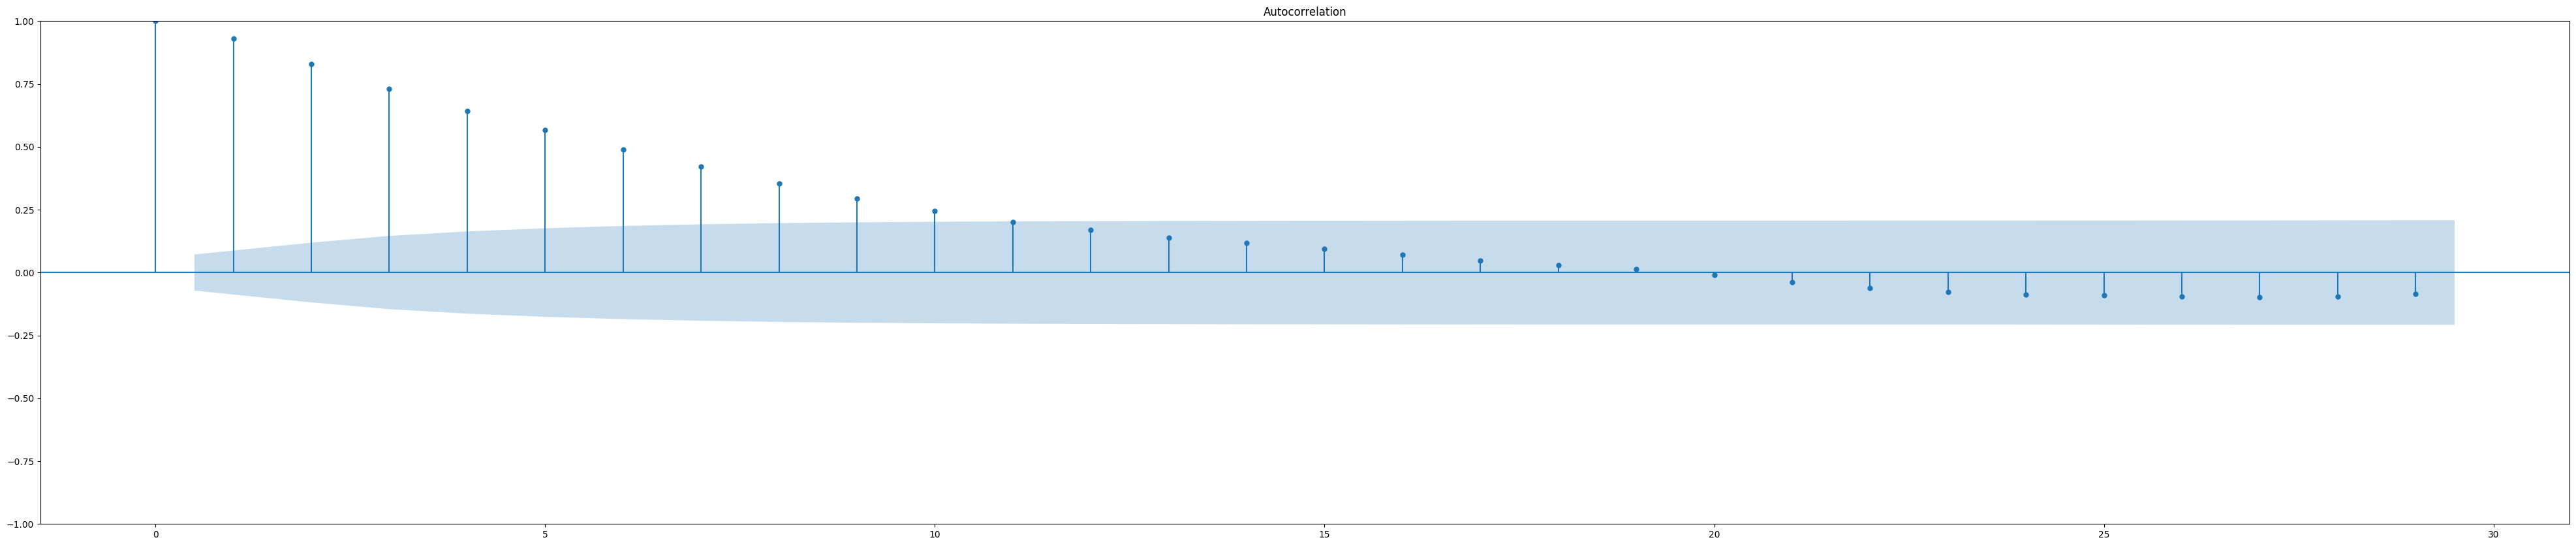

In [389]:
plot_acf(df_2_2011)
print()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


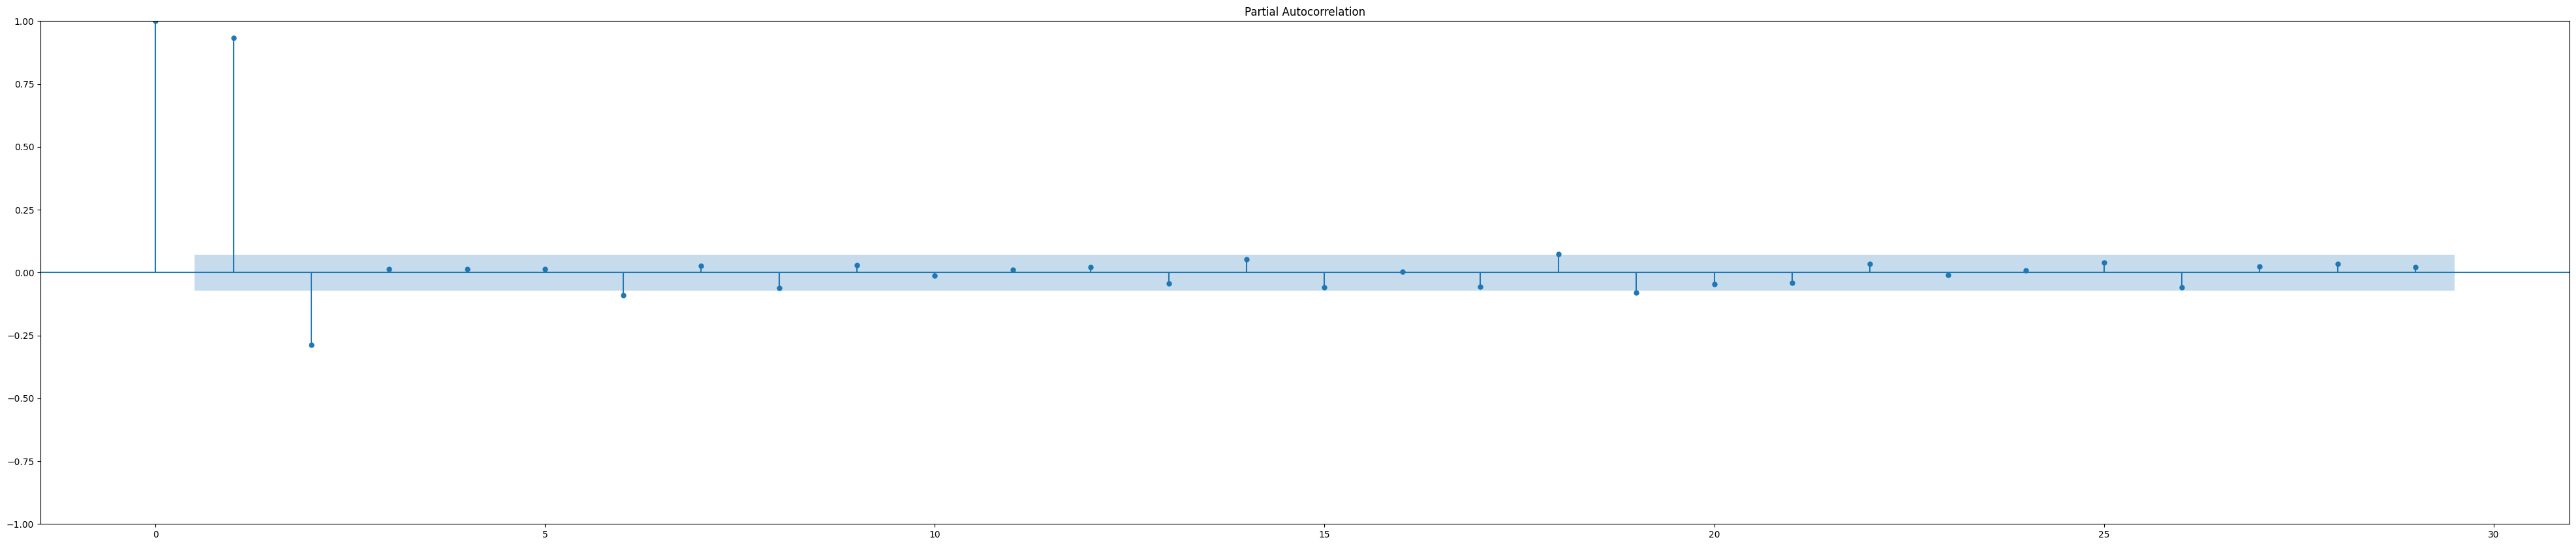

In [388]:
plot_pacf(df_2_2011)
print()

In [391]:
#let us use the adfuller test
result = adfuller(df_2_2011)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.548591
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


Hence Statonarity Established

In [392]:
model3 = ARIMA(df_2_2011,order = (1,0,0)).fit()
model4 = ARIMA(df_2_2012,order = (1,0,0)).fit()

In [393]:
pred = [predict(date) for date in df_pred['date'].to_list()]
df_pred['wp2'] = pd.Series(pred)

##For Wp3

In [398]:
df_3 = df_train['wp3']
df_3_hour = df_3.resample('H').mean()
df_3_hour.fillna(0, inplace = True)

In [406]:
df_3_2011 = df_3_hour['2011-01-01':'2011-01-31']
df_3_2012 = df_3_hour['2012-01-01':'2012-01-31']

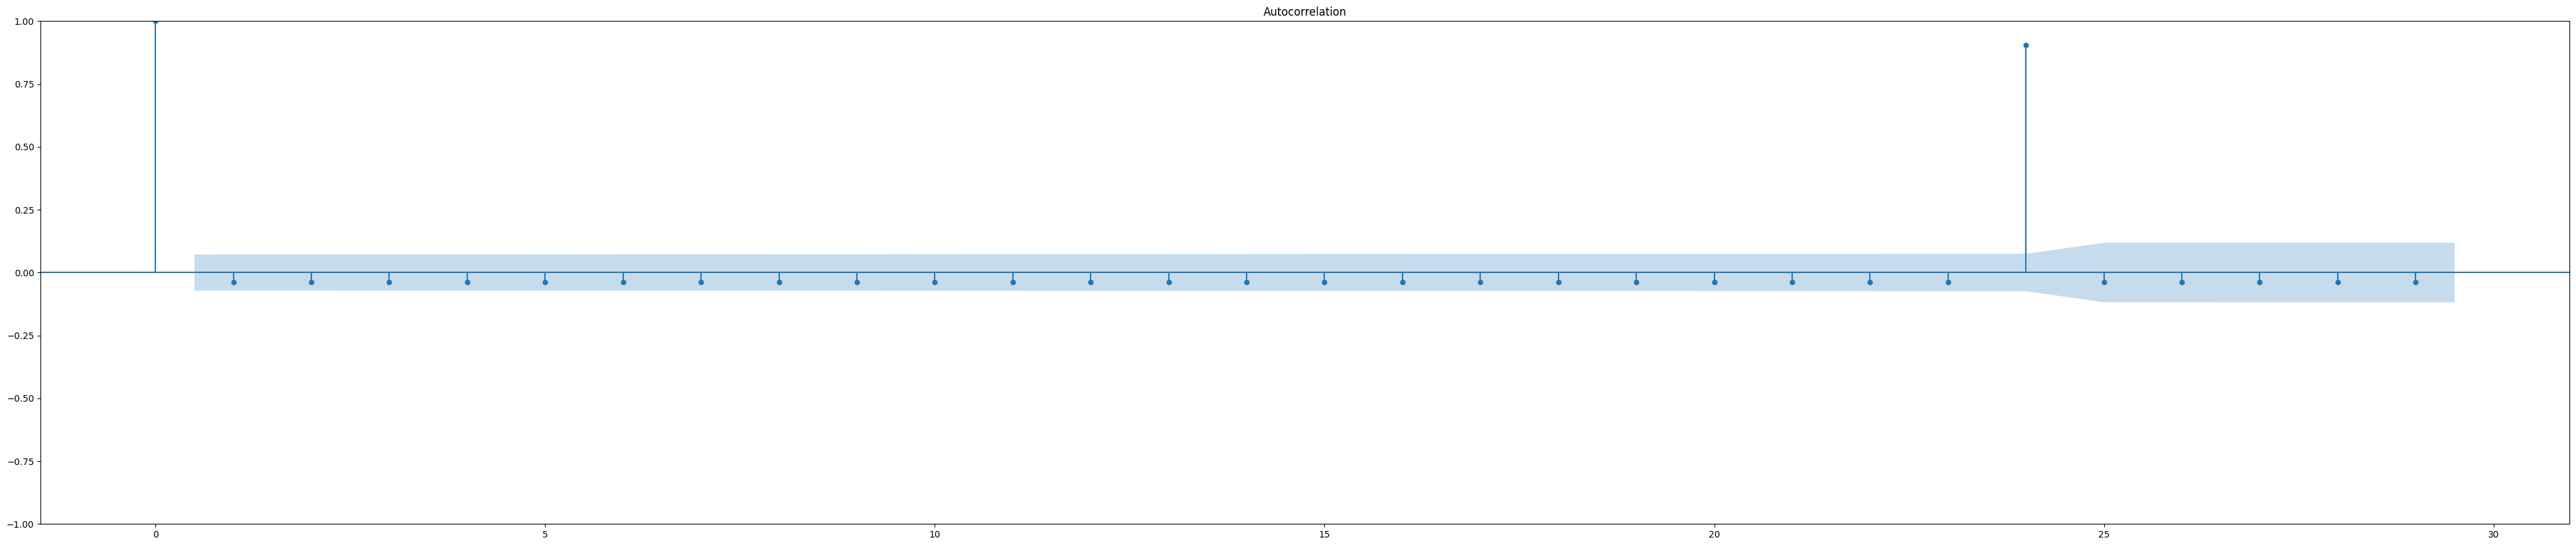

In [413]:
plot_acf(df_3_2011)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


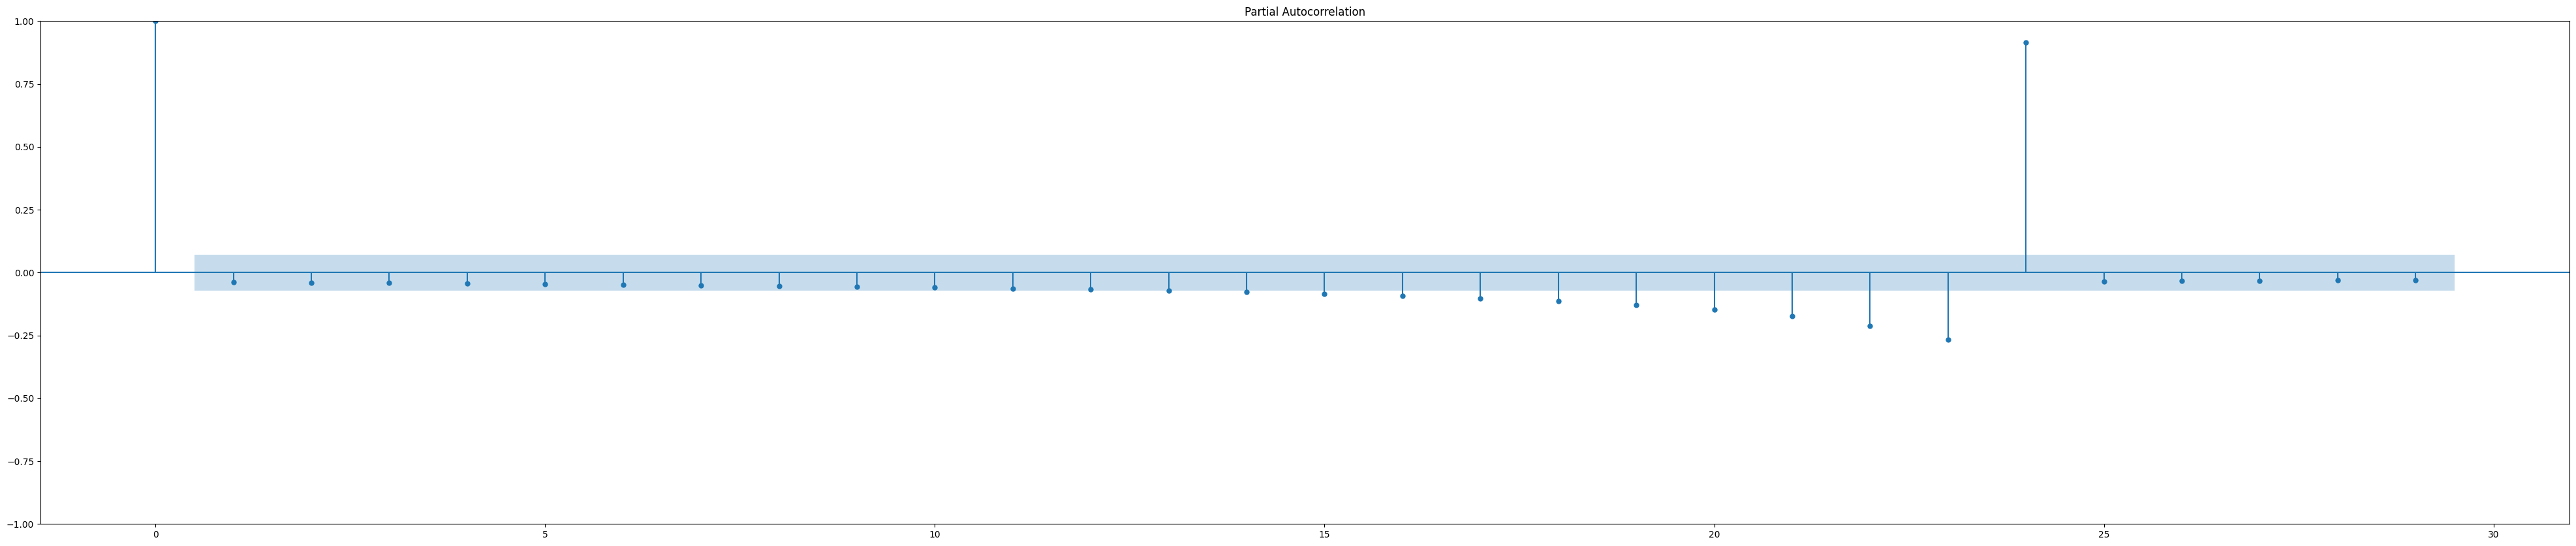

In [416]:
plot_pacf(df_3_2011)
print()

In [414]:
#let us use the adfuller test
result = adfuller(df_2_2011)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.548591
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


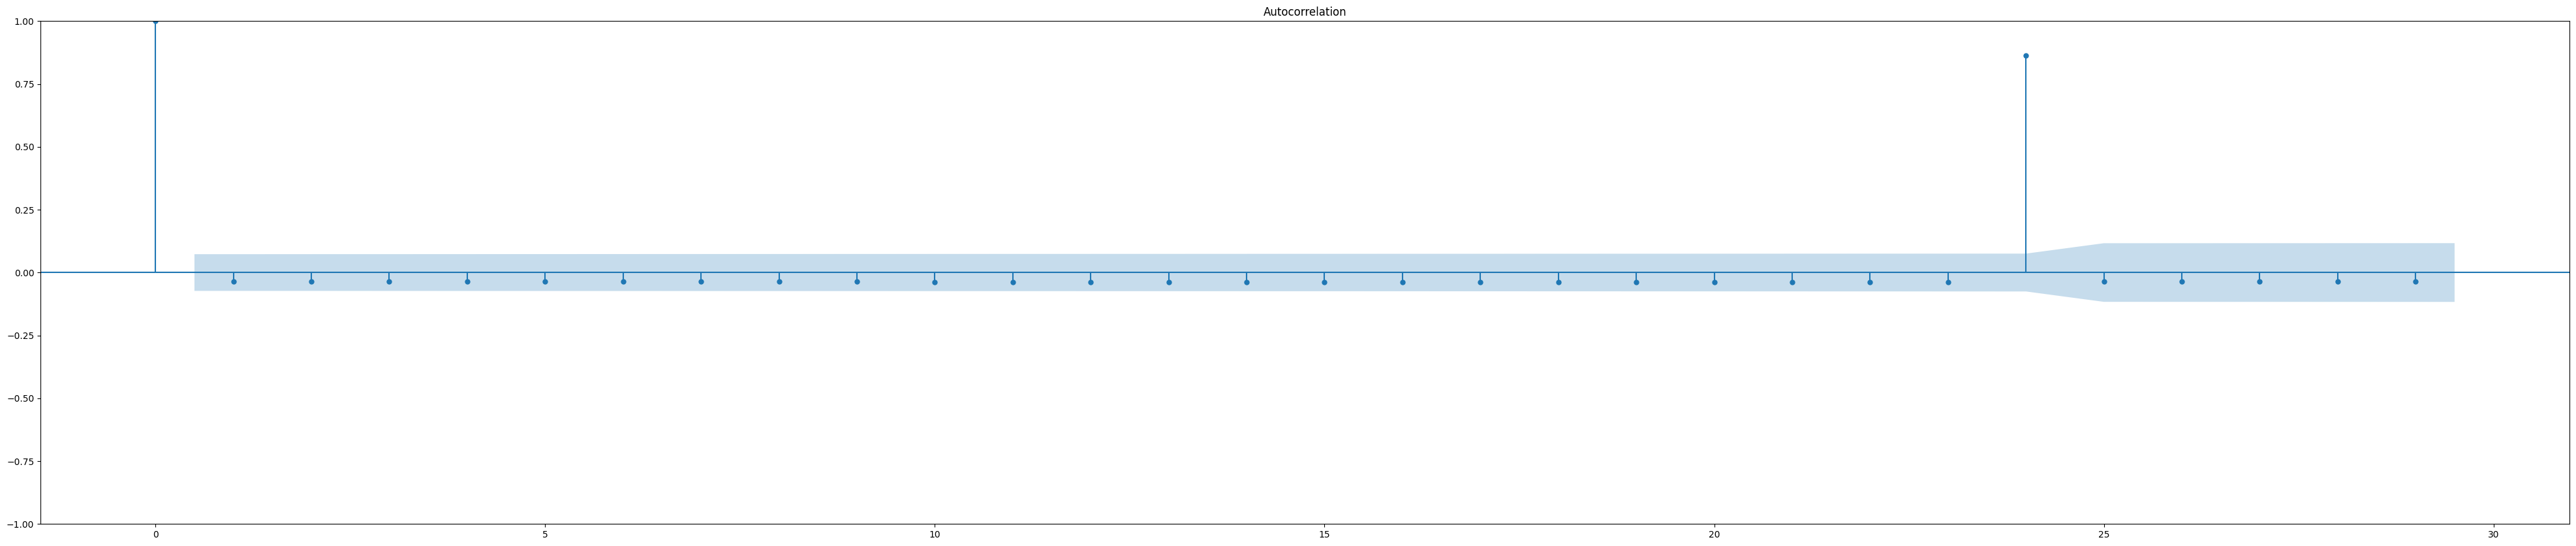

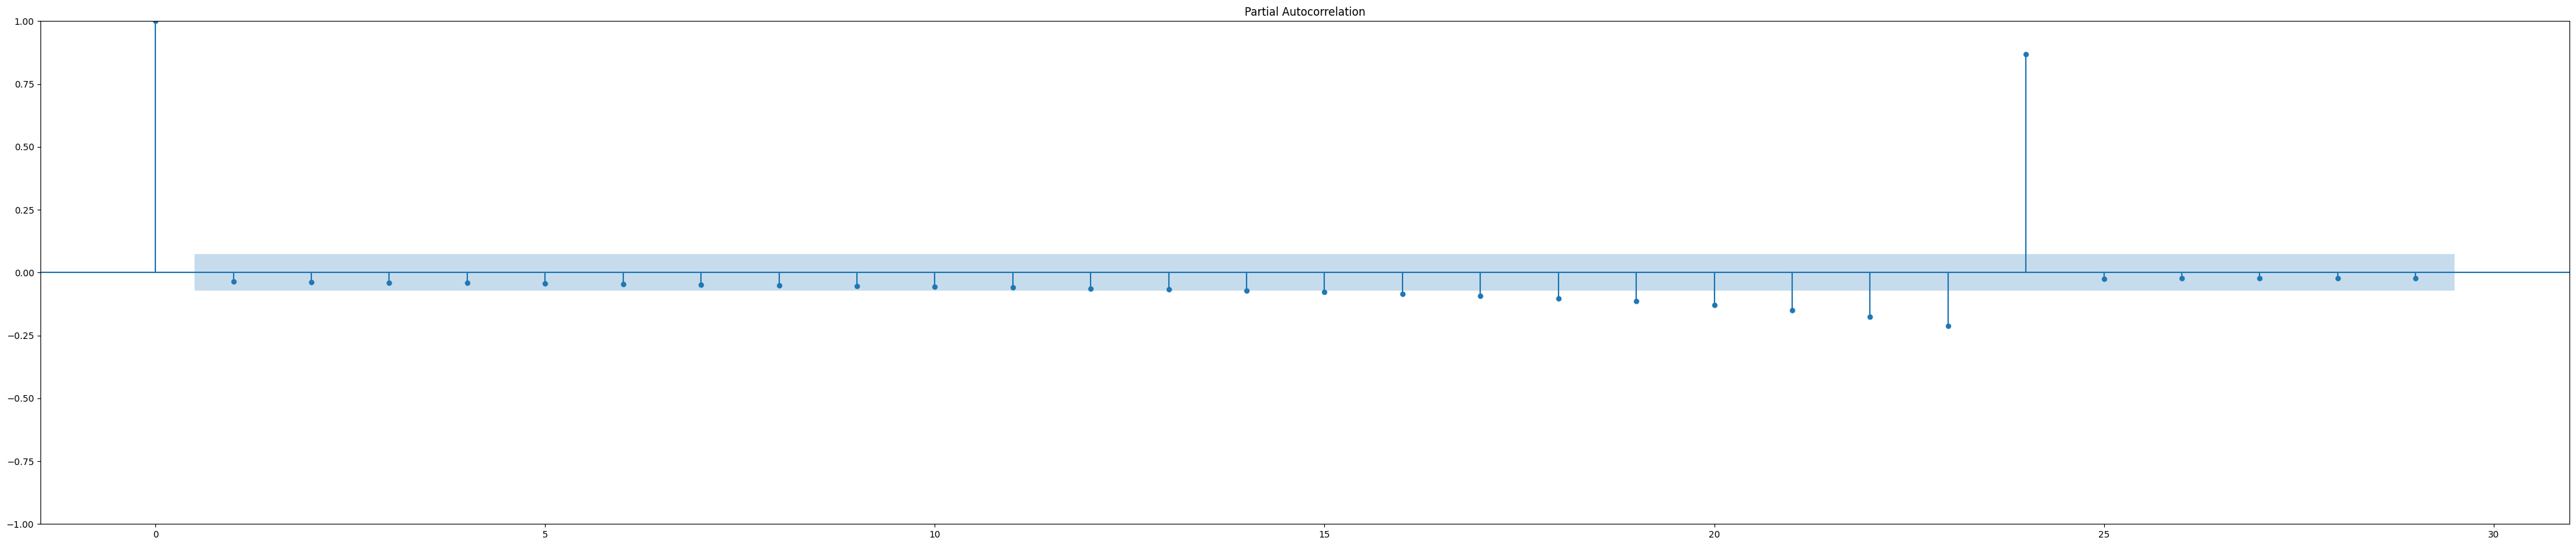

In [418]:
plot_acf(df_3_2012)
plot_pacf(df_3_2012)
print()

In [425]:
model_autoARIMA = auto_arima(df_3_2011, start_p=7, start_q=0 ,
                      test='adf',       
                      max_p= 30, max_q=30, 
                      m= 7,              
                      d= 1,
                      seasonal = False,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-1805.631, Time=2.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1395.603, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1606.113, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1397.599, Time=0.08 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-1796.119, Time=1.03 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=-1812.699, Time=1.55 sec
 ARIMA(9,1,0)(0,0,0)[0] intercept   : AIC=-1818.025, Time=1.32 sec
 ARIMA(10,1,0)(0,0,0)[0] intercept   : AIC=-1822.065, Time=1.71 sec
 ARIMA(11,1,0)(0,0,0)[0] intercept   : AIC=-1825.130, Time=1.67 sec
 ARIMA(12,1,0)(0,0,0)[0] intercept   : AIC=-1827.438, Time=3.55 sec
 ARIMA(13,1,0)(0,0,0)[0] intercept   : AIC=-1829.145, Time=4.49 sec
 ARIMA(14,1,0)(0,0,0)[0] intercept   : AIC=-1830.369, Time=3.24 sec
 ARIMA(15,1,0)(0,0,0)[0] intercept   : AIC=-1831.198, Time=4.33 sec
 ARIMA(16,1,0)(0,0,

In [432]:
model3 = ARIMA(df_3_2011,order = (16,1,2)).fit()
model4 = ARIMA(df_3_2012,order = (16,1,2)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels

In [453]:
def predict (d):
  if d.month > 1 :
    return 0
  else:
    if d.year < 2012:
      return model3.predict(d).mean()
    else:
      return model4.predict(d).mean()

In [454]:
pred = [predict(date) for date in df_pred['date'].to_list()]
df_pred['wp3'] = pd.Series(pred)

##For Wp4

In [442]:
df_4 = df_train['wp4']
df_4_hour = df_4.resample('H').mean()
df_4_hour.fillna(0, inplace = True)

In [444]:
df_4_2011 = df_4_hour['2011-01-01':'2011-01-31']
df_4_2012 = df_4_hour['2012-01-01':'2012-01-31']

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


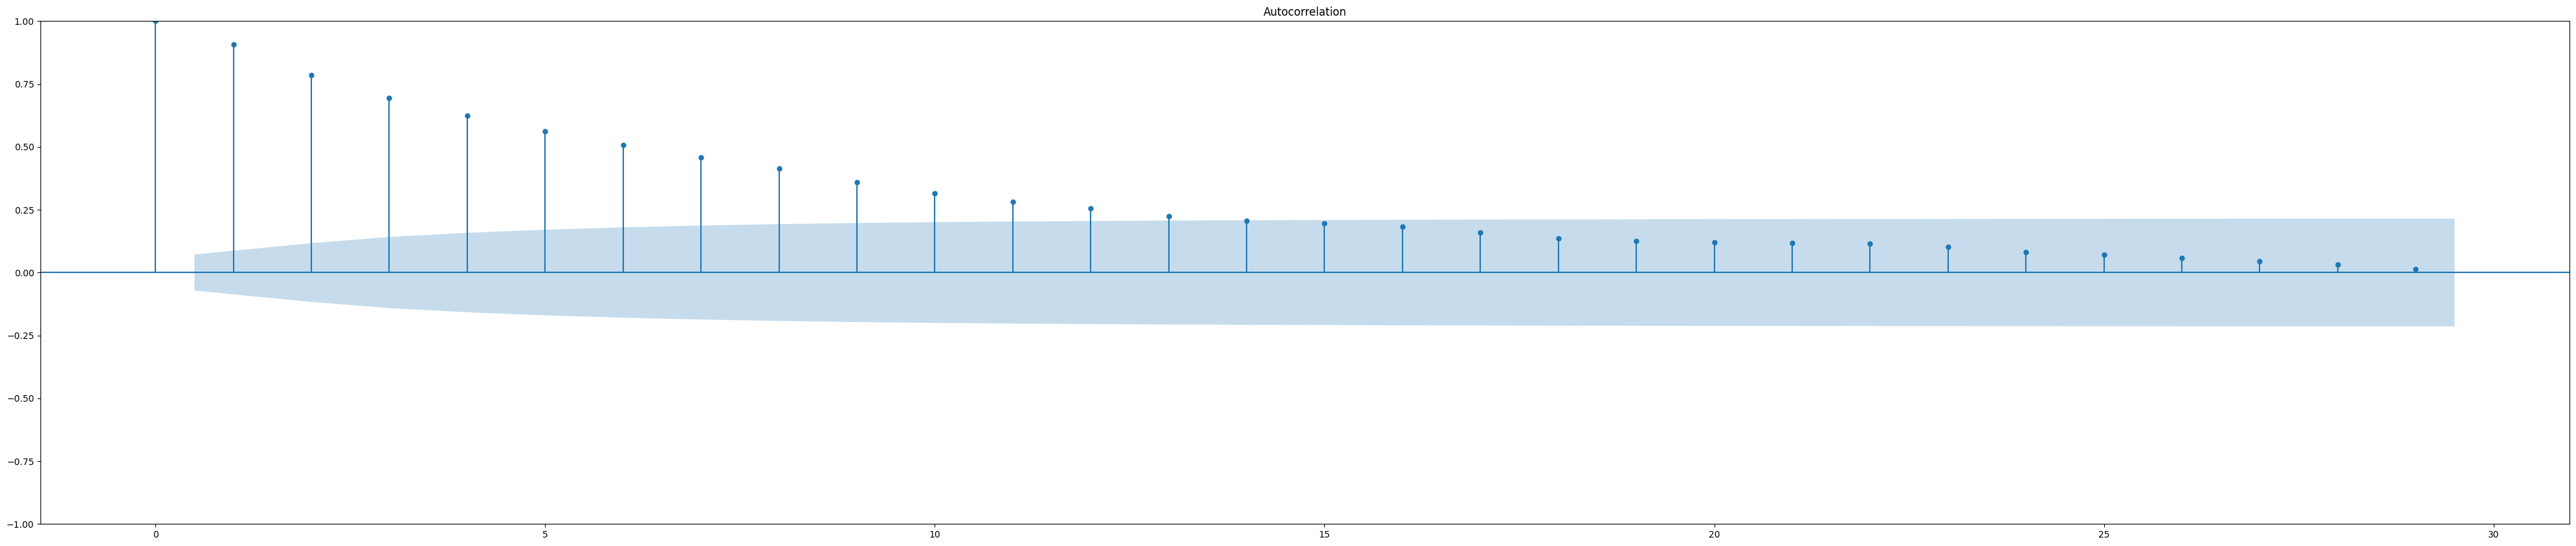

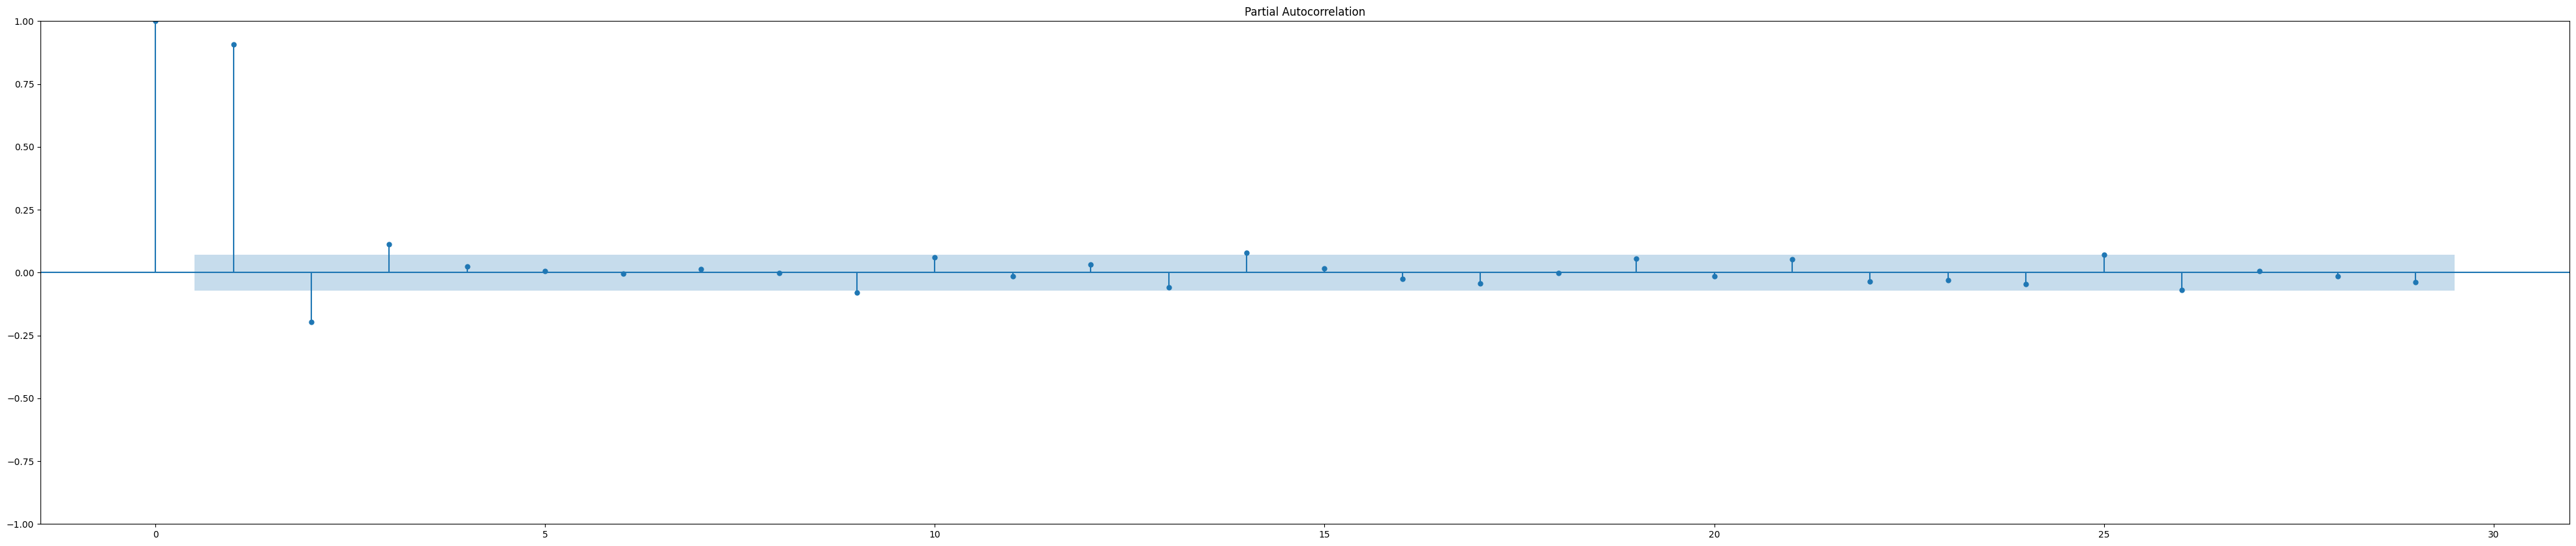

In [445]:
plot_acf(df_4_2012)
plot_pacf(df_4_2012)
print()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


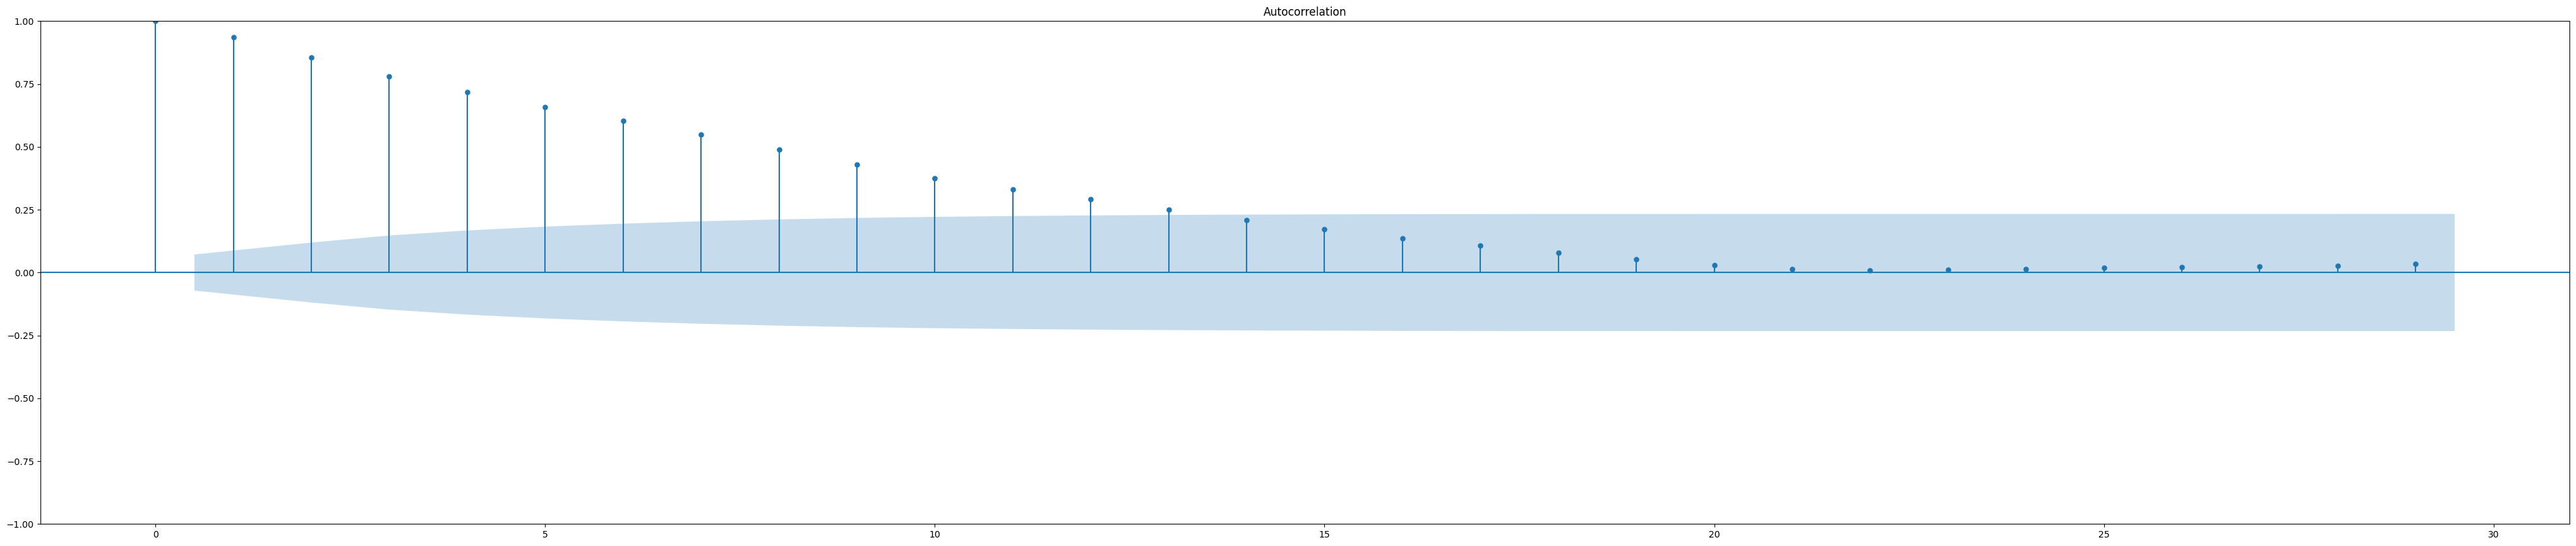

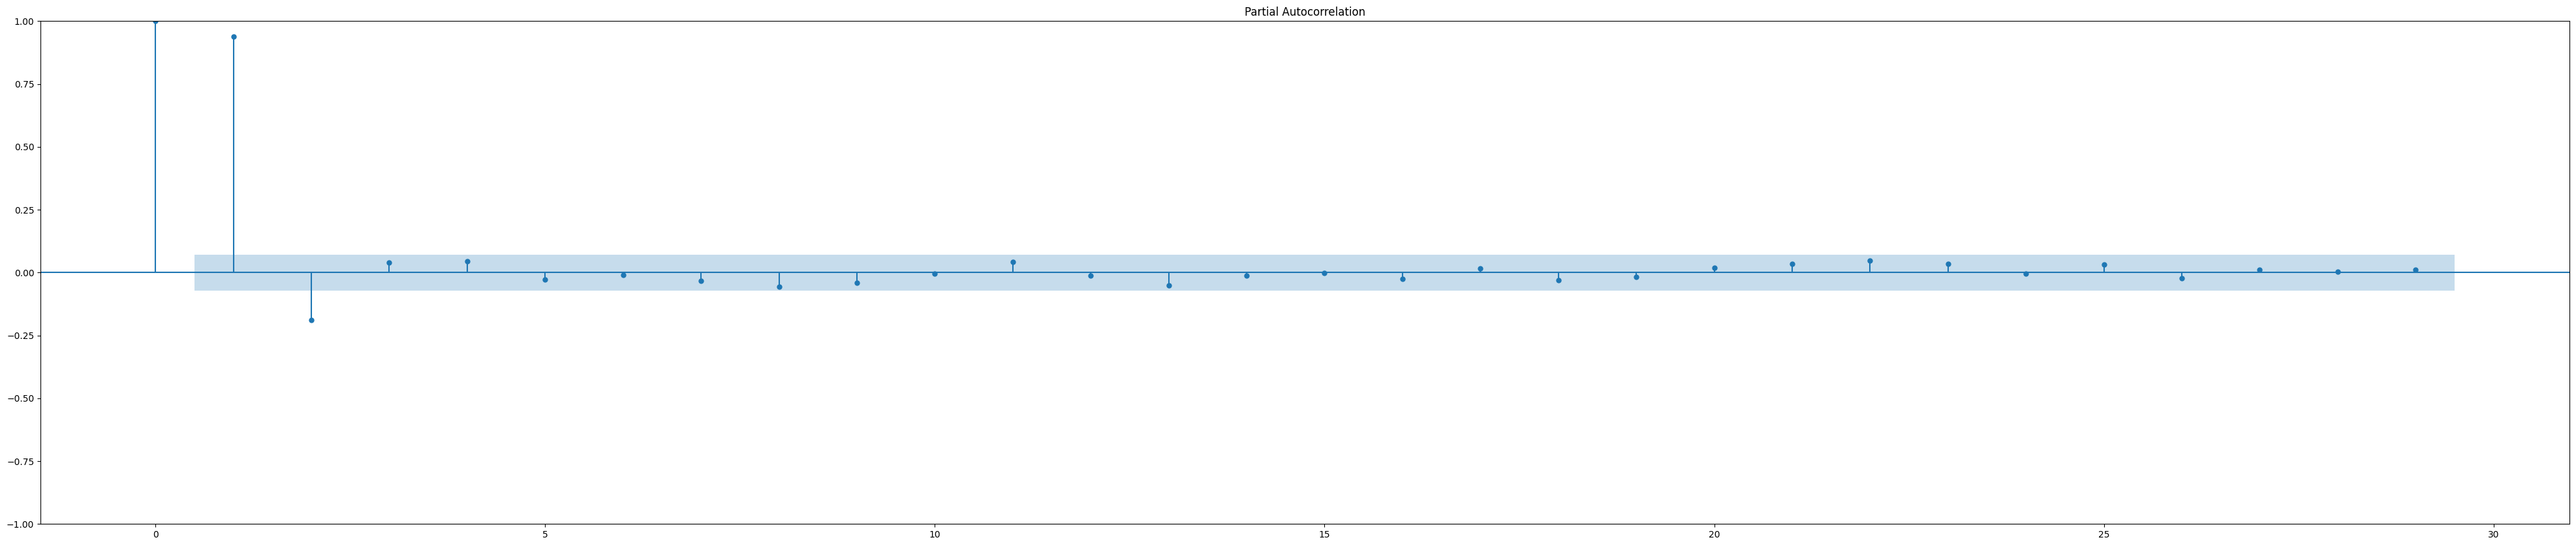

In [446]:
plot_acf(df_4_2011)
plot_pacf(df_4_2011)
print()

In [449]:
#let us use the adfuller test
result = adfuller(df_4_2012)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.227551
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [450]:
model3 = ARIMA(df_4_2011,order = (3,0,1)).fit()
model4 = ARIMA(df_4_2012,order = (3,0,1)).fit()

In [455]:
pred = [predict(date) for date in df_pred['date'].to_list()]
df_pred['wp4'] = pd.Series(pred)

<Axes: xlabel='date'>

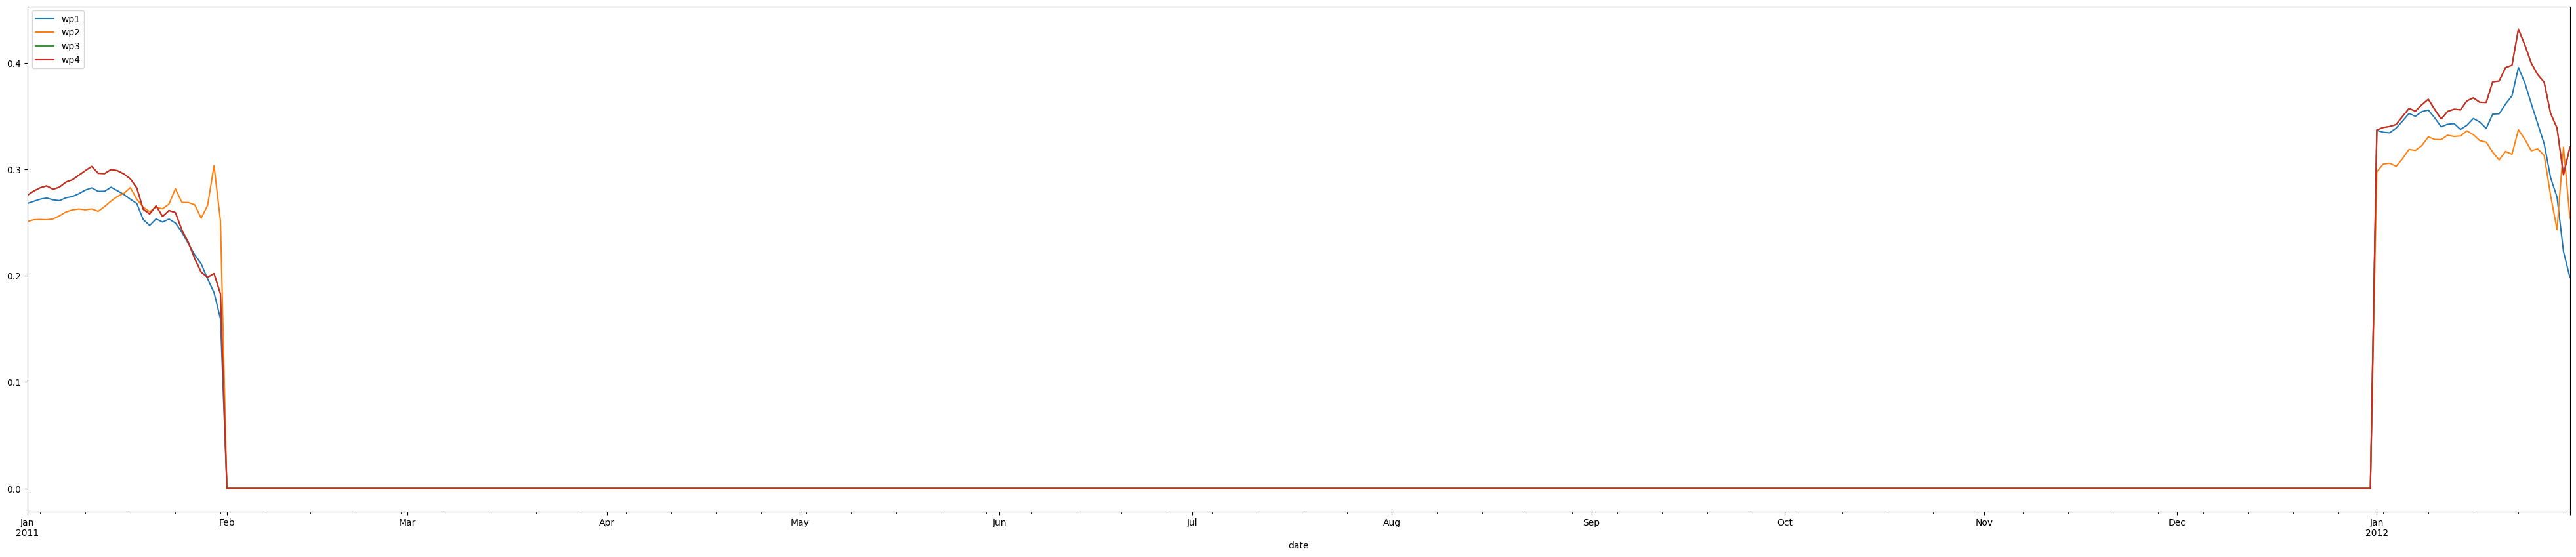

In [456]:
df_pred.set_index('date').plot()

##For Wp5

In [458]:
df_5 = df_train['wp5']
df_5_hour = df_5.resample('H').mean()
df_5_hour.fillna(0, inplace = True)

In [459]:
df_5_2011 = df_5_hour['2011']
df_5_2012 = df_5_hour['2012']

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


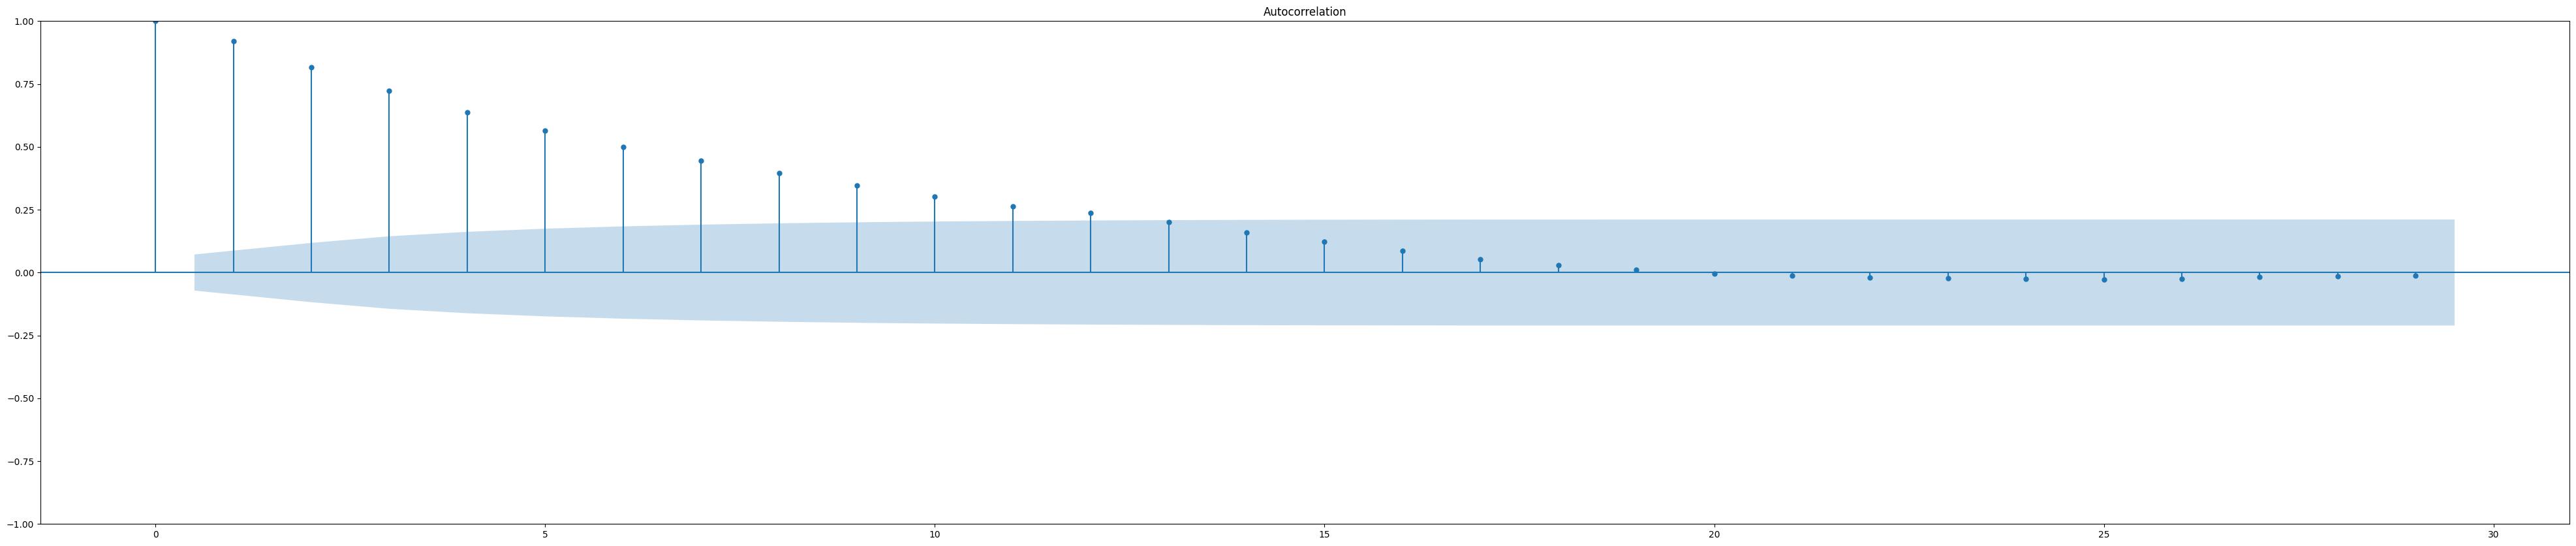

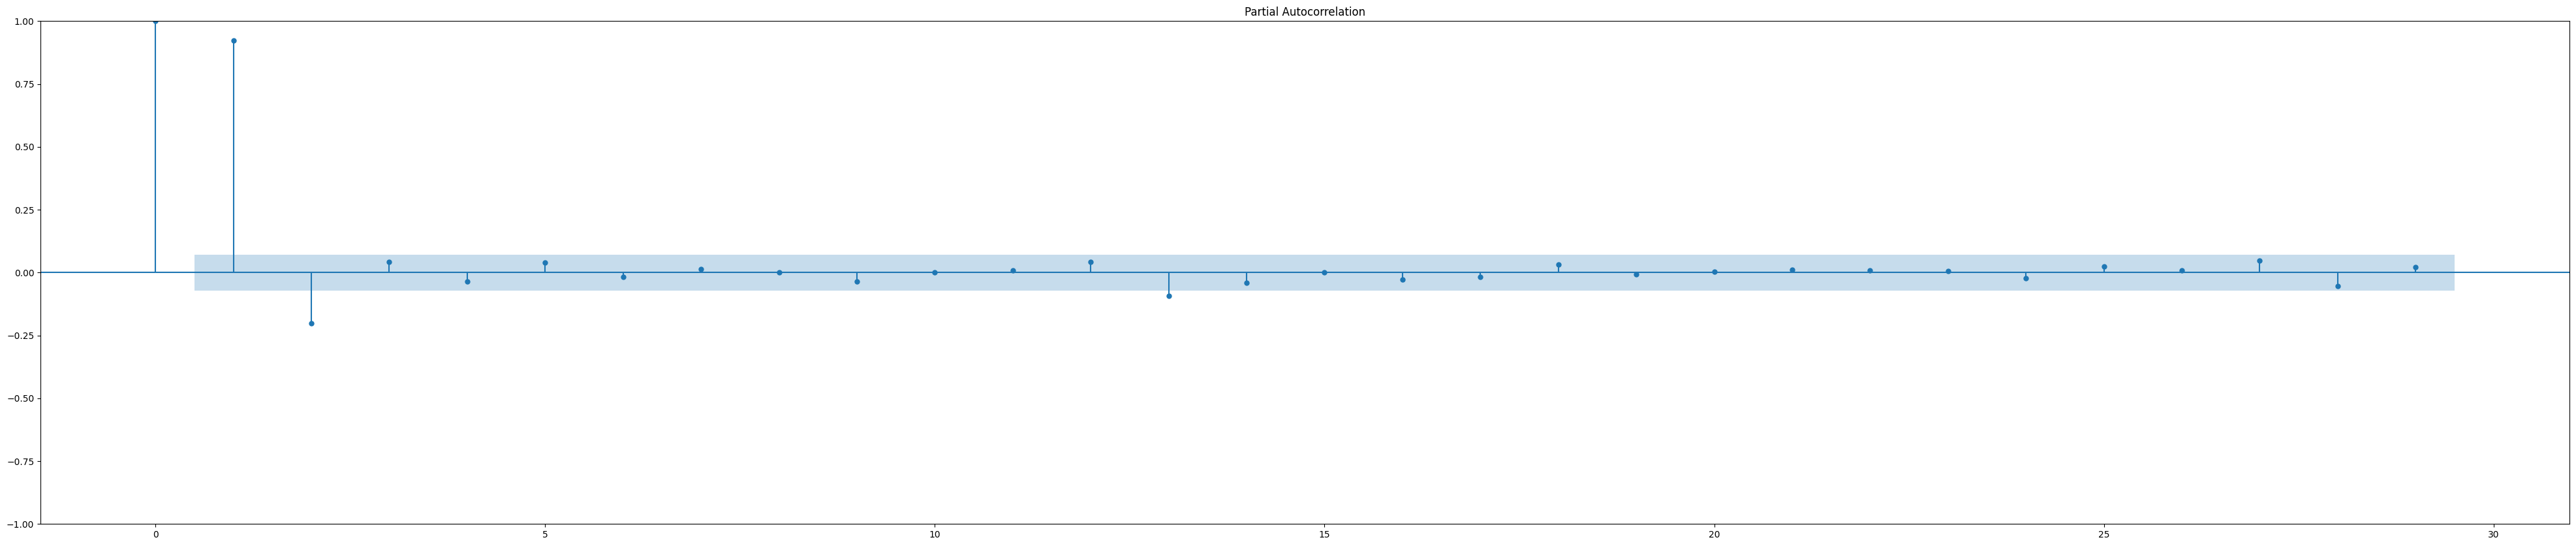

In [461]:
plot_acf(df_5_2012)
plot_pacf(df_5_2012)
print()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


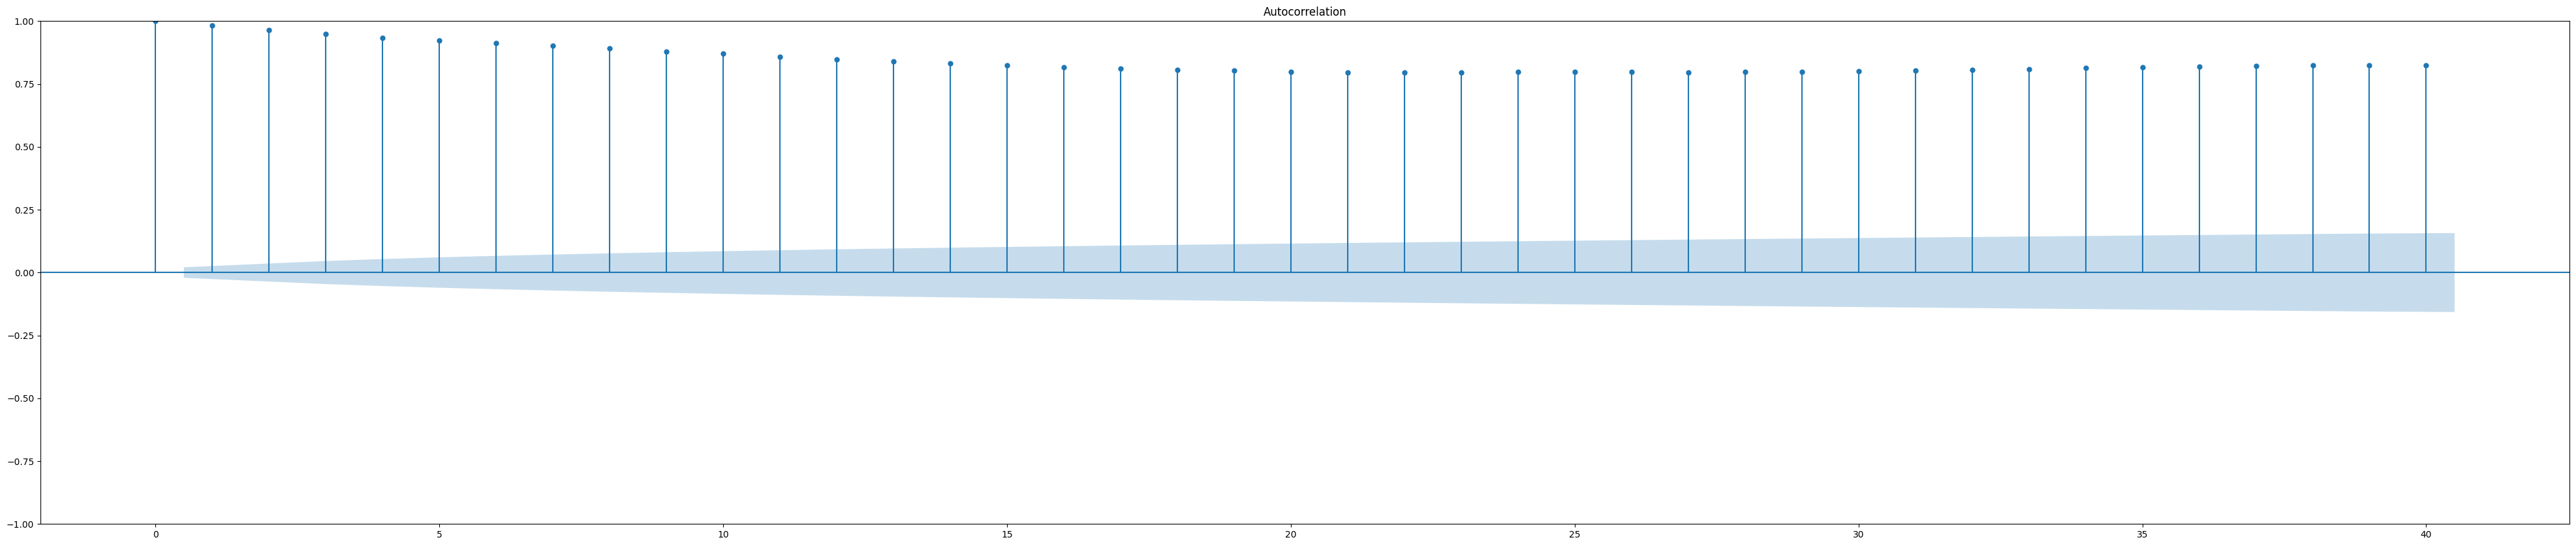

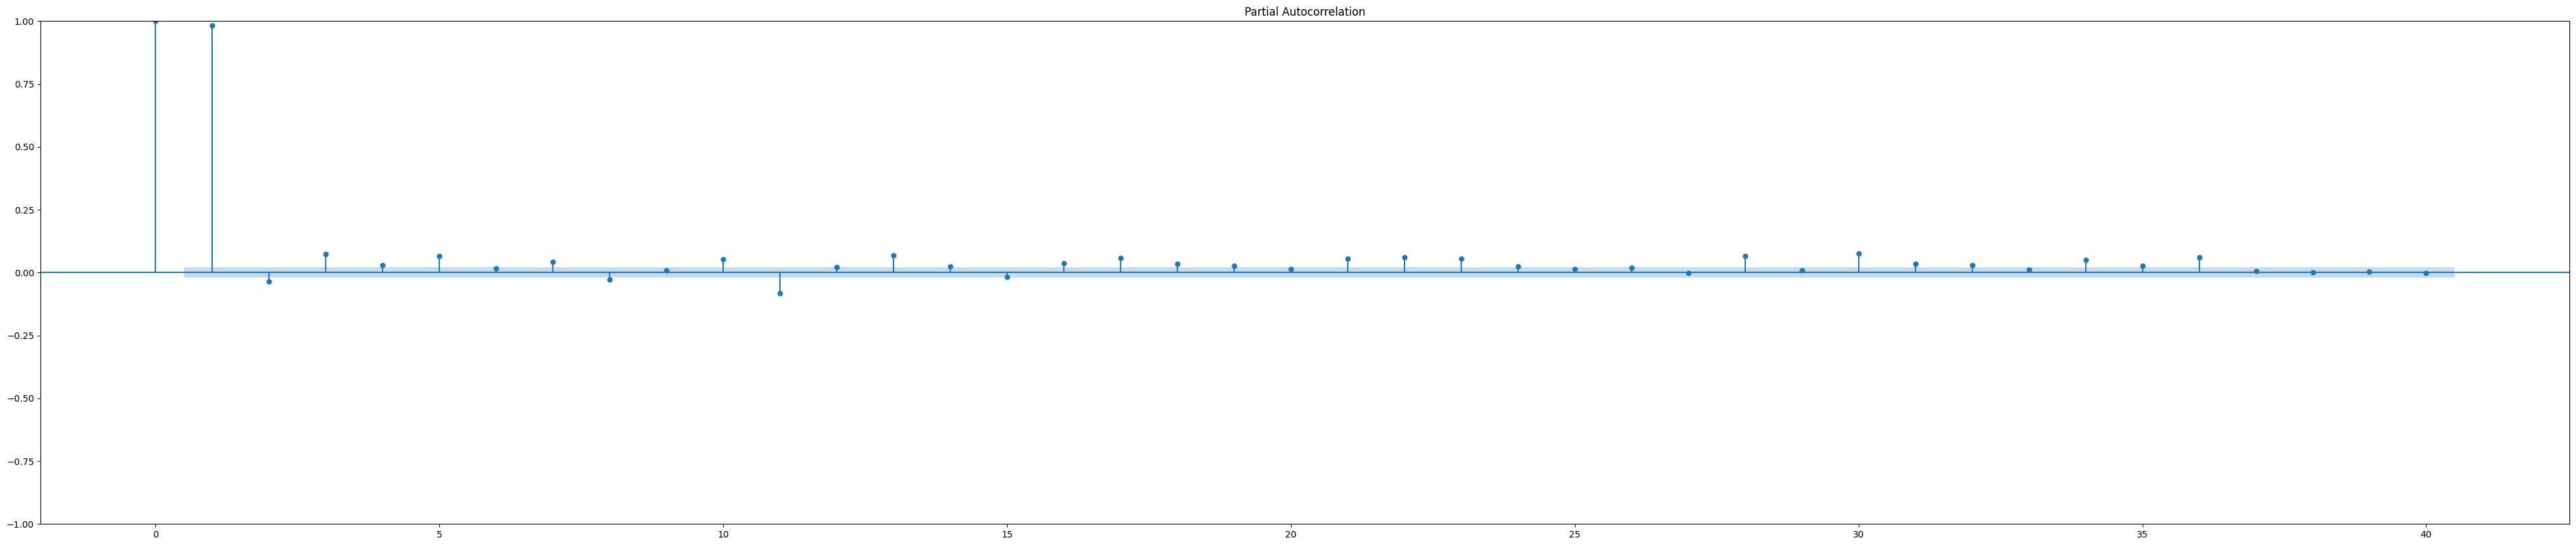

In [463]:
plot_acf(df_5_2011)
plot_pacf(df_5_2011)
print()

In [464]:
model_autoARIMA = auto_arima(df_5_2011, start_p=7, start_q=0 ,
                      test='adf',       
                      max_p= 30, max_q=30, 
                      m= 7,              
                      d= 1,
                      seasonal = False,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-48088.676, Time=7.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-47916.414, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-47935.581, Time=3.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-47938.807, Time=3.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-47918.356, Time=0.88 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-48084.195, Time=5.40 sec
 ARIMA(8,1,0)(0,0,0)[0] intercept   : AIC=-48088.337, Time=9.08 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-48086.779, Time=9.81 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-48082.692, Time=27.49 sec
 ARIMA(8,1,1)(0,0,0)[0] intercept   : AIC=-48085.987, Time=7.59 sec
 ARIMA(7,1,0)(0,0,0)[0]             : AIC=-48090.599, Time=1.91 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=-48086.114, Time=3.21 sec
 ARIMA(8,1,0)(0,0,0)[0]             : AIC=-48090.259, Time=3.55 sec
 ARIMA(7,1,1)(0,0,0)[0]             : AIC=-48088.702, Time=2.00 sec
 ARI

In [471]:
model3 = ARIMA(df_5_2011,order = (7,1,0)).fit()
model4 = ARIMA(df_5_2012,order = (3,0,1)).fit()

In [472]:
pred = [predict(date) for date in df_pred['date'].to_list()]
df_pred['wp5'] = pd.Series(pred)

<Axes: xlabel='date'>

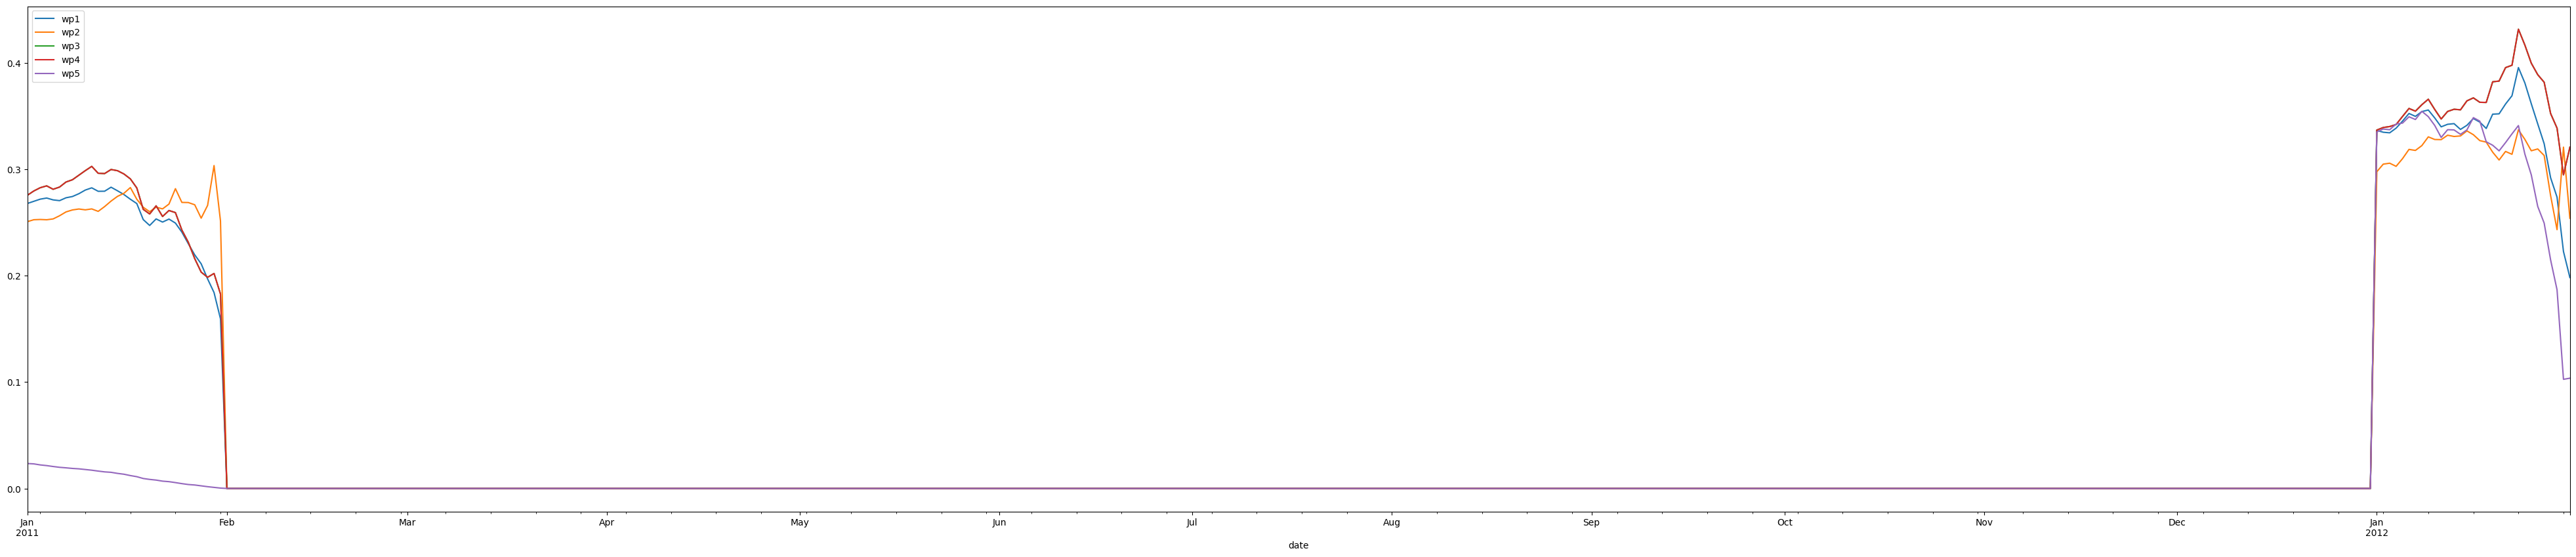

In [473]:
df_pred.set_index('date').plot()

##For Wp6

In [474]:
df_6 = df_train['wp6']
df_6_hour = df_6.resample('H').mean()
df_6_hour.fillna(0, inplace = True)

In [475]:
df_6_2011 = df_6_hour['2011']
df_6_2012 = df_6_hour['2012']

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


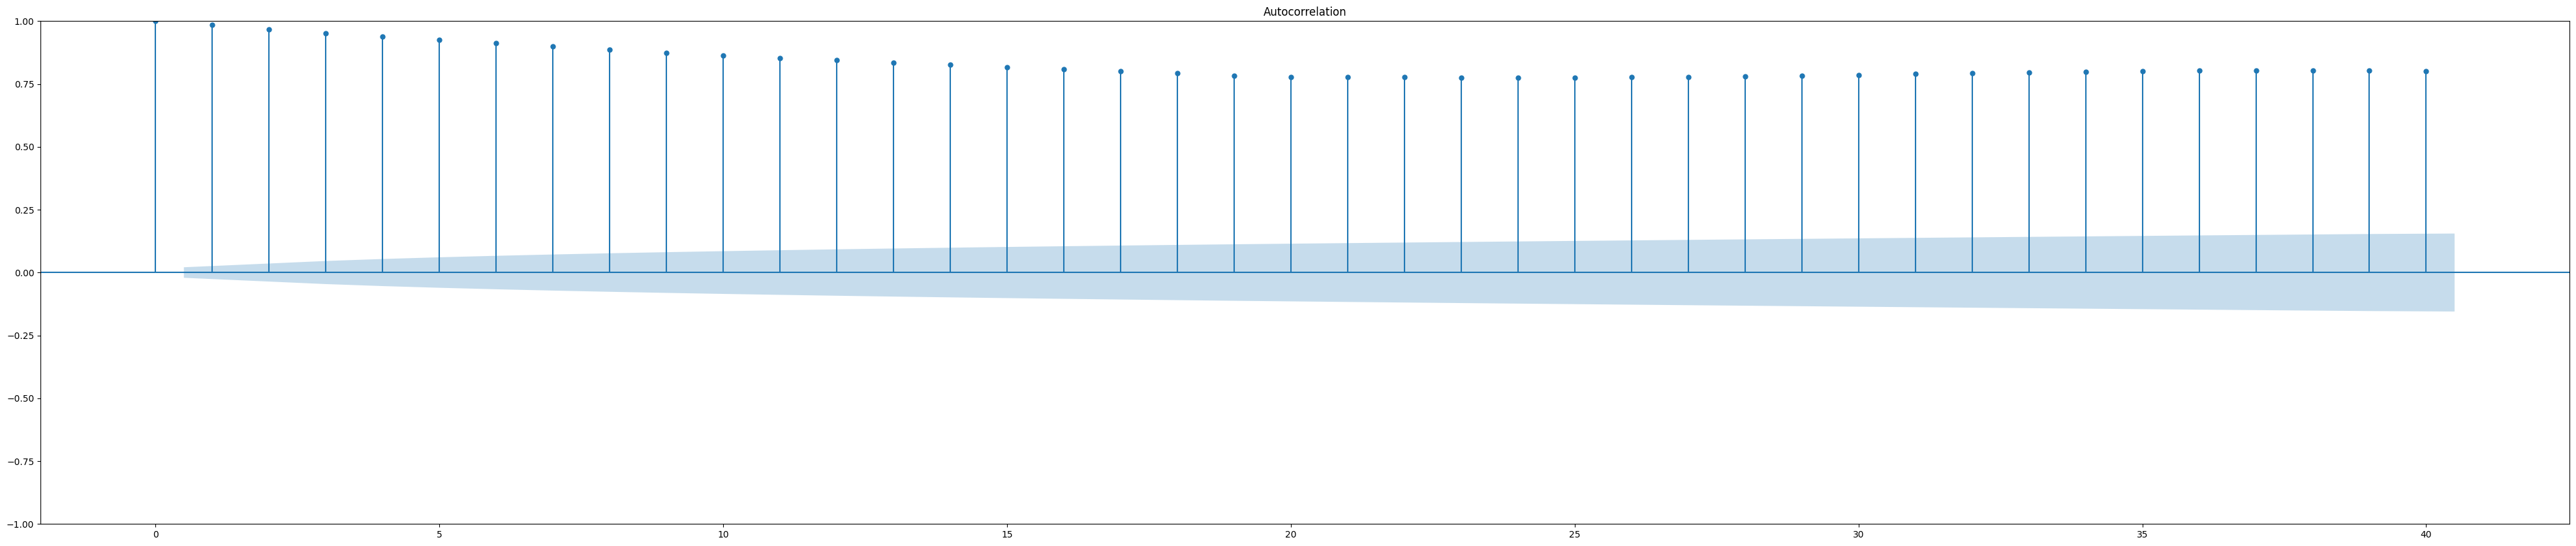

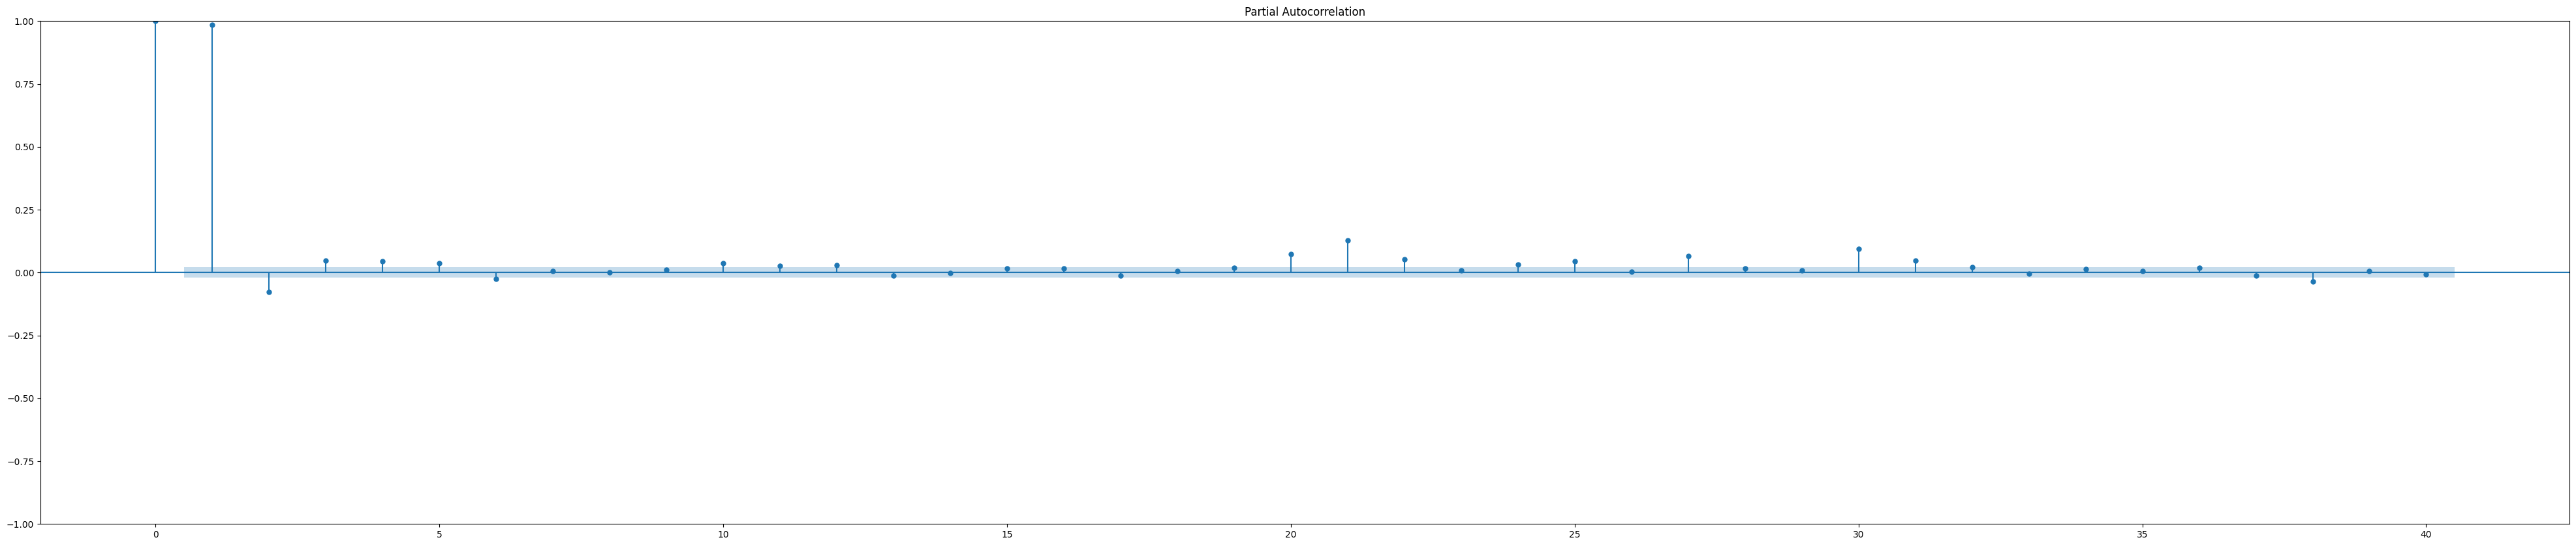

In [477]:
plot_acf(df_6_2011)
plot_pacf(df_6_2011)
print()

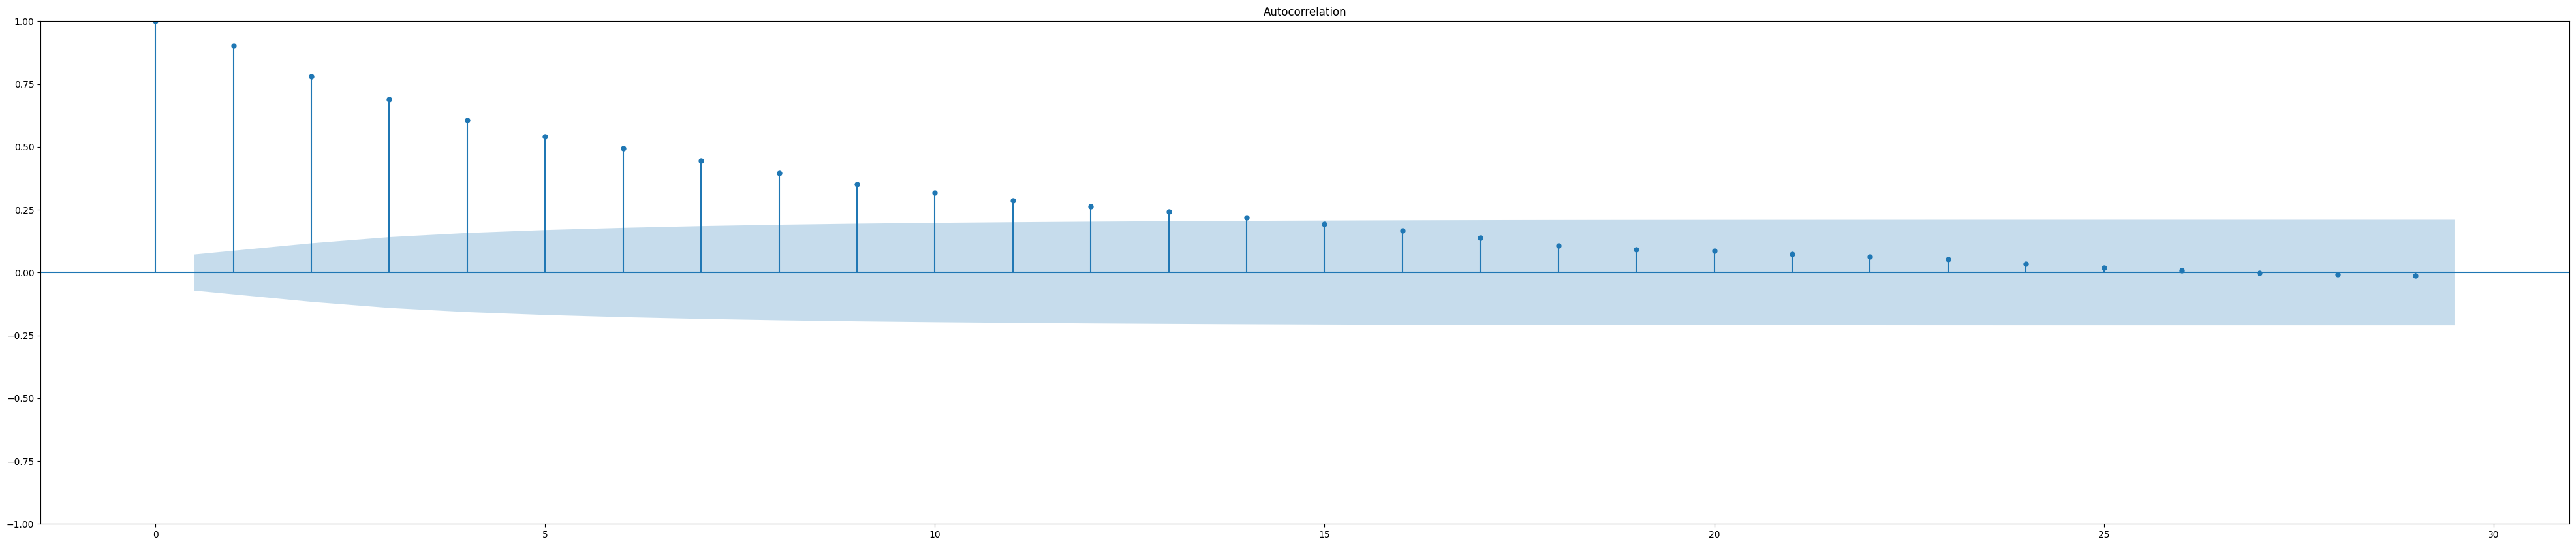

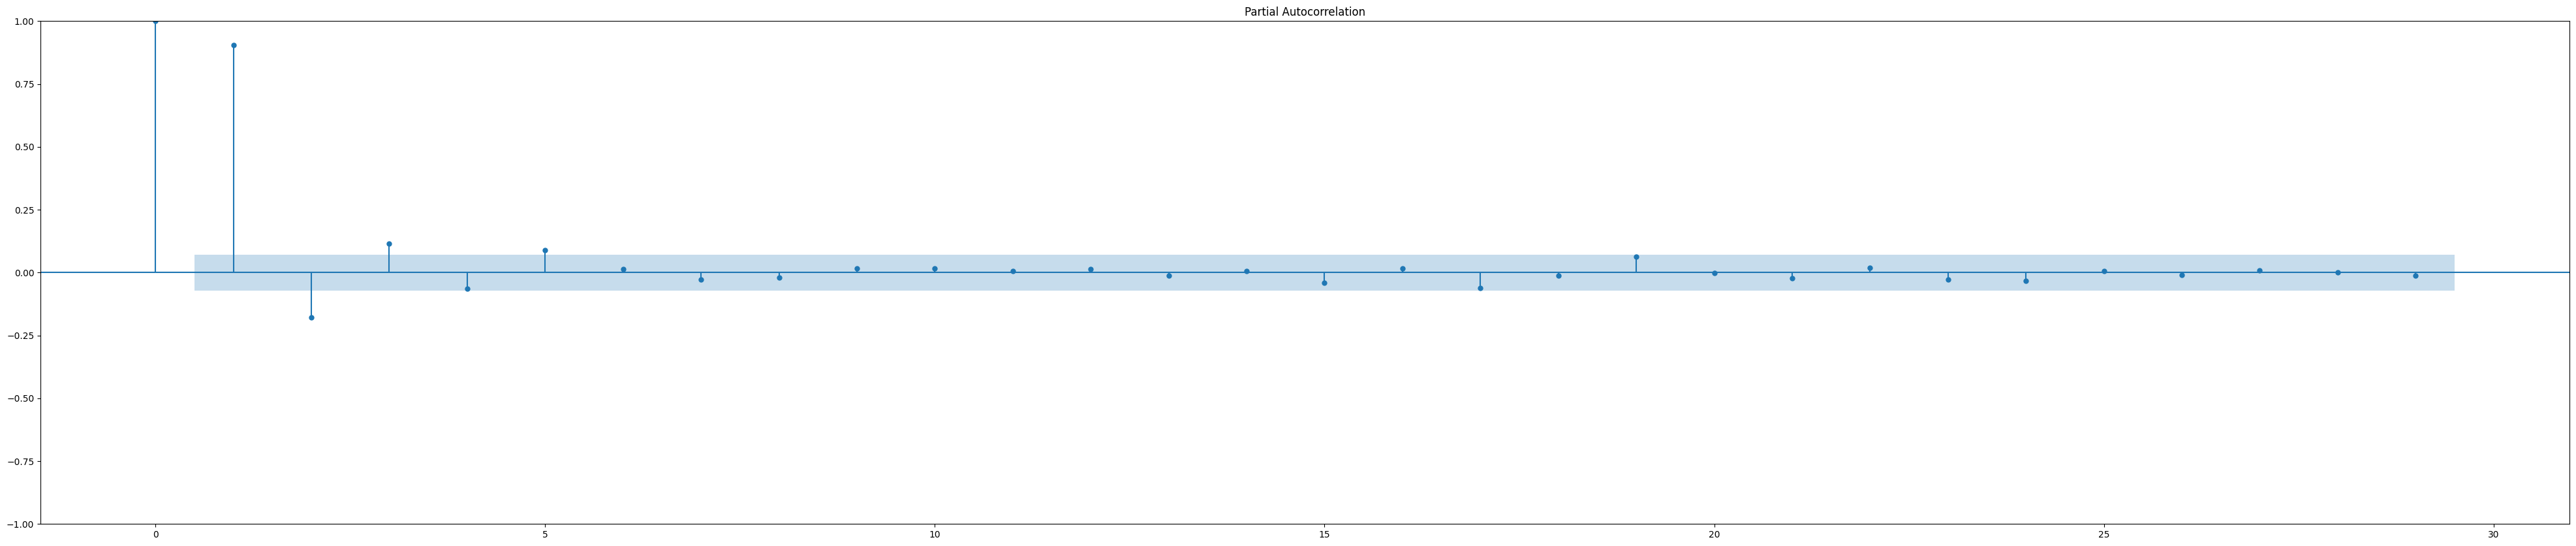

In [478]:
plot_acf(df_6_2012)
plot_pacf(df_6_2012)
print()

In [479]:
#let us use the adfuller test
result = adfuller(df_6_2011)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.598263
p-value: 0.005794
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [480]:
result = adfuller(df_6_2012)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.766578
p-value: 0.000001
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [481]:
model_autoARIMA = auto_arima(df_6_2011, start_p=7, start_q=0 ,
                      test='adf',       
                      max_p= 30, max_q=30, 
                      m= 7,              
                      d= 1,
                      seasonal = False,   
                      start_P=1, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-48852.735, Time=14.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-48650.516, Time=1.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-48779.882, Time=2.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-48794.243, Time=6.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-48652.410, Time=0.41 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-48854.325, Time=5.56 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-48852.591, Time=5.90 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-48852.604, Time=12.89 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-48851.861, Time=11.20 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-48851.094, Time=14.62 sec
 ARIMA(6,1,0)(0,0,0)[0]             : AIC=-48856.219, Time=1.55 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-48854.487, Time=4.58 sec
 ARIMA(7,1,0)(0,0,0)[0]             : AIC=-48854.629, Time=6.24 sec
 ARIMA(6,1,1)(0,0,0)[0]             : AIC=-48854.013, Time=3.75 sec
 

In [485]:
model3 = ARIMA(df_6_2011,order = (6,1,0)).fit()
model4 = ARIMA(df_6_2012,order = (3,0,1)).fit()

In [486]:
pred = [predict(date) for date in df_pred['date'].to_list()]
df_pred['wp6'] = pd.Series(pred)

<Axes: xlabel='date'>

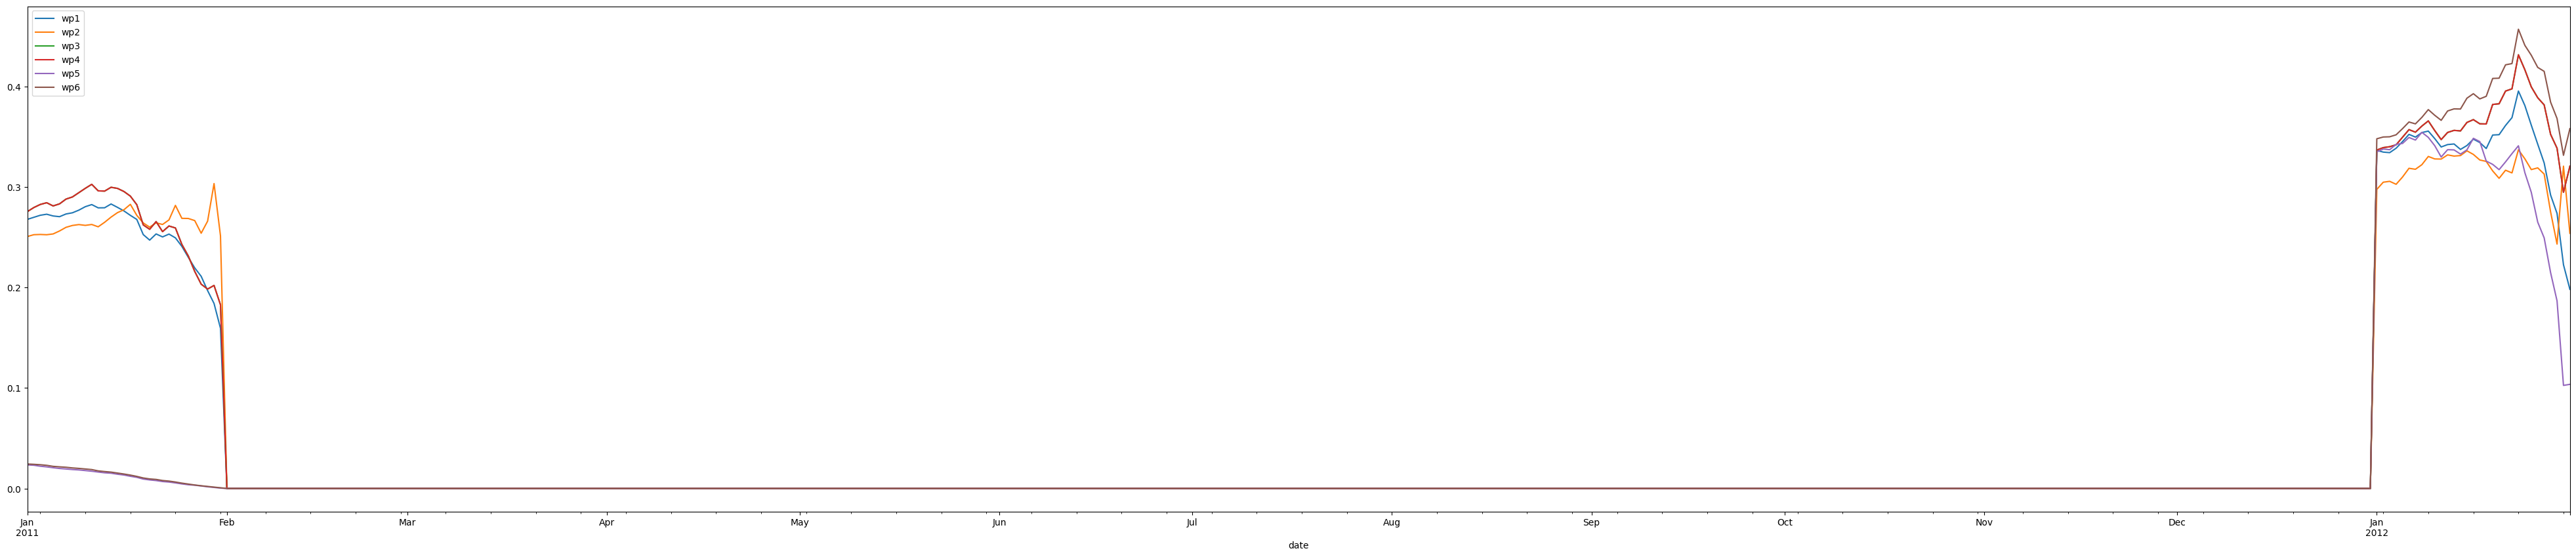

In [487]:
df_pred.set_index('date').plot()

In [495]:
df_7 = df_train['wp7']
df_7_hour = df_7.resample('H').mean()
df_7_hour.fillna(0, inplace = True)

df_7_2011 = df_7_hour['2011']
df_7_2012 = df_7_hour['2012']

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


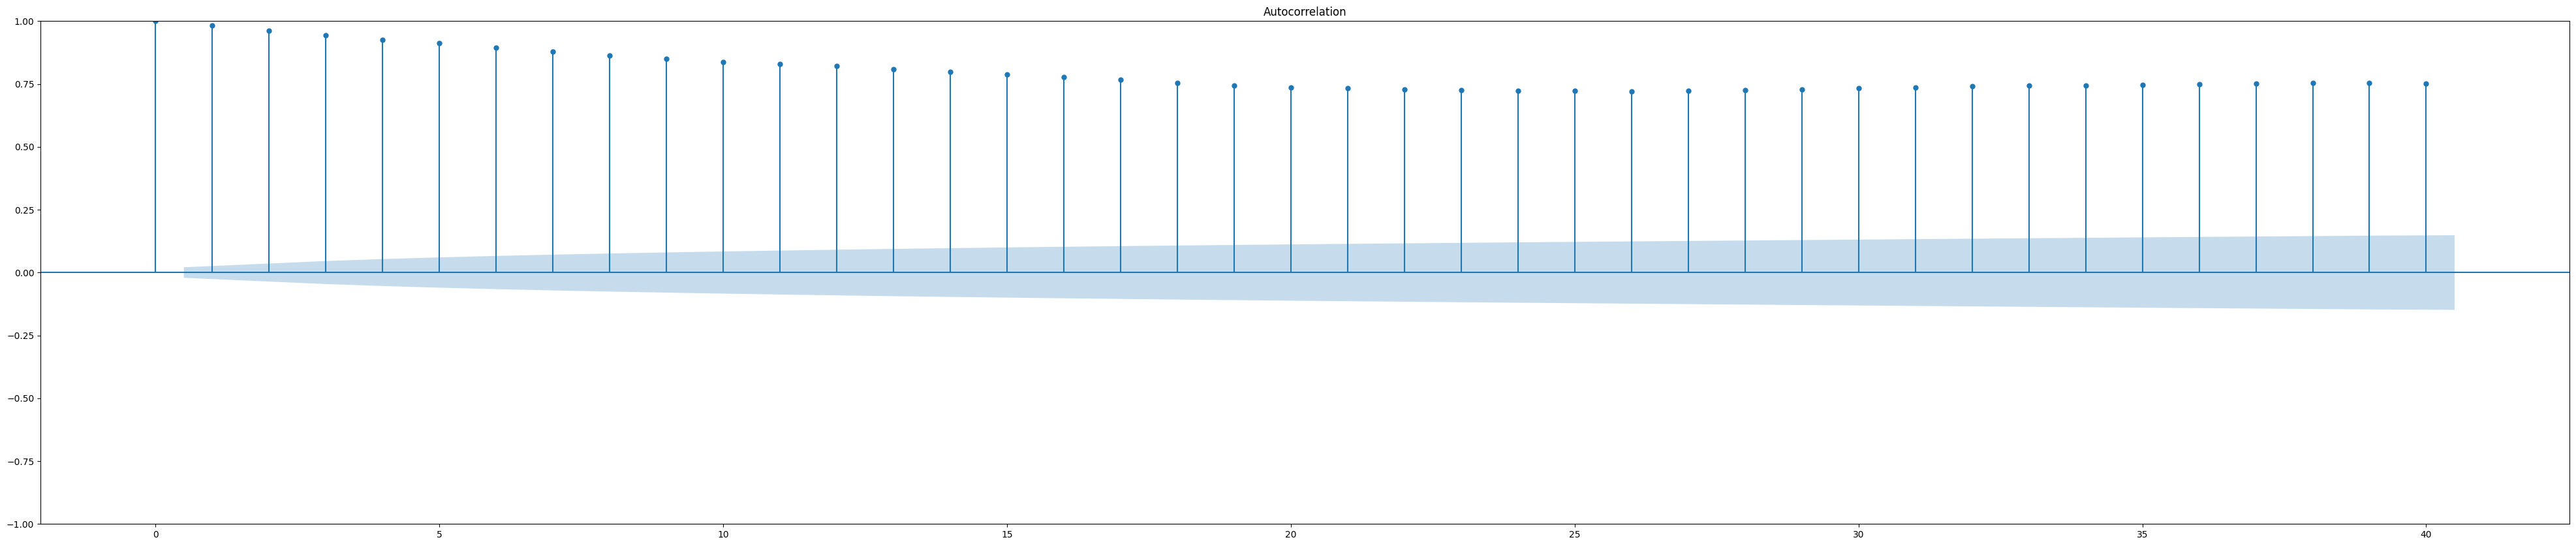

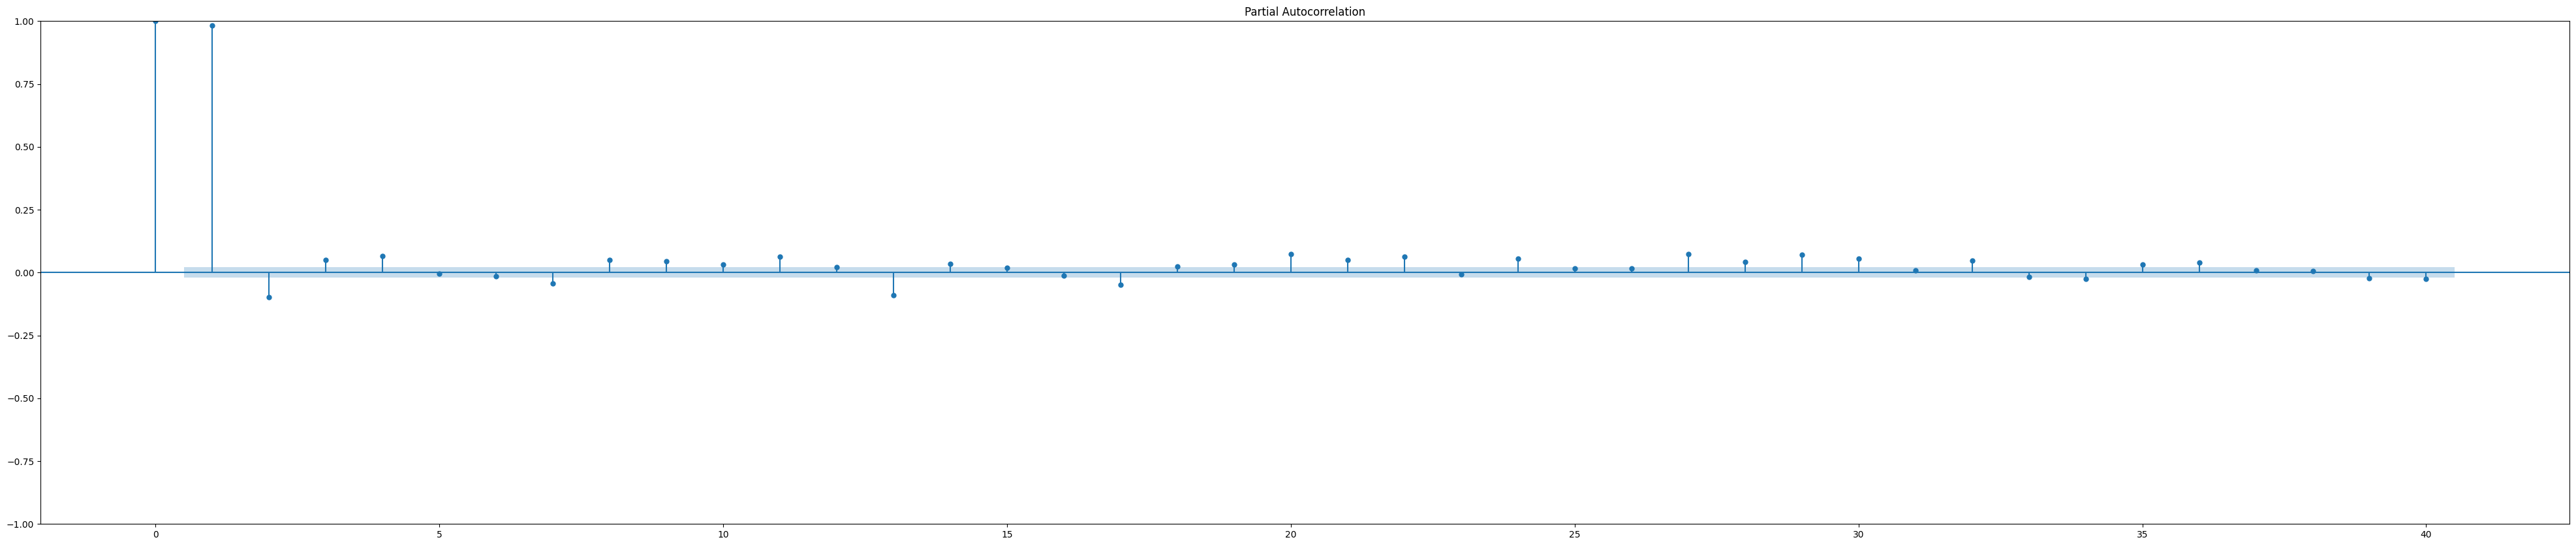

In [496]:
plot_acf(df_7_2011)
plot_pacf(df_7_2011)
print()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


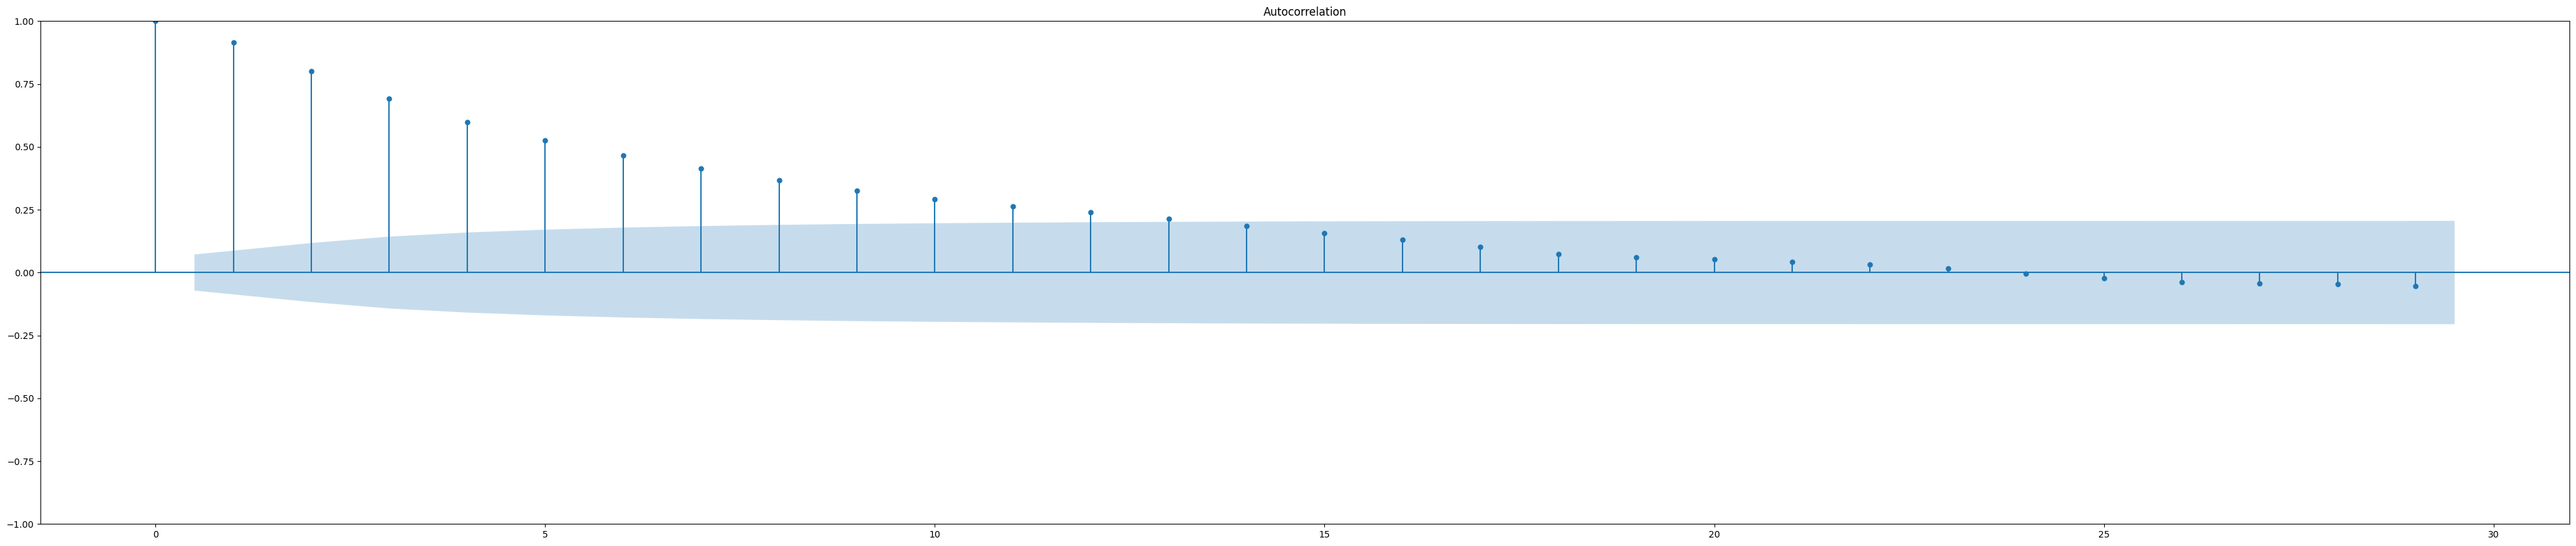

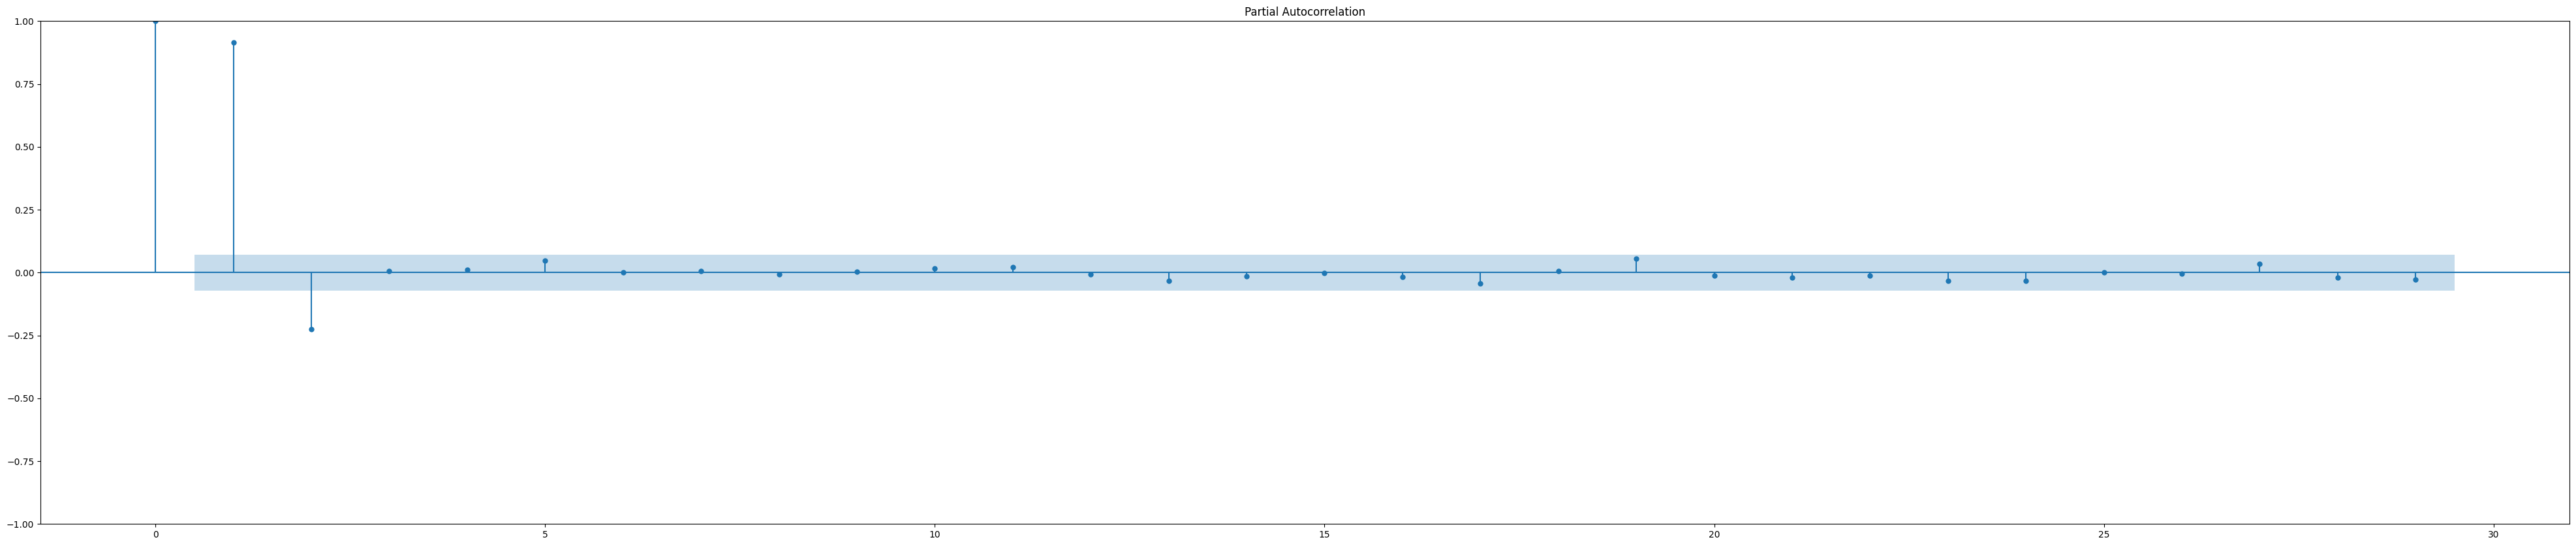

In [497]:
plot_acf(df_7_2012)
plot_pacf(df_7_2012)
print()

In [499]:
#let us use the adfuller test
result = adfuller(df_7_2011)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.095901
p-value: 0.000984
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [500]:
#let us use the adfuller test
result = adfuller(df_7_2012)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.025135
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [510]:
model3 = ARIMA(df_7_2011,order = (6,0,0)).fit()
model4 = ARIMA(df_7_2012,order = (3,0,1)).fit()

In [514]:
def predict (d):
  if d.month > 1 :
    return 0
  else:
    if d.year < 2012:
      return model3.predict(d).mean()
    else:
      return model4.predict(d).mean()

In [515]:
pred = [predict(date) for date in df_pred['date'].to_list()]
df_pred['wp7'] = pd.Series(pred)

<Axes: xlabel='date'>

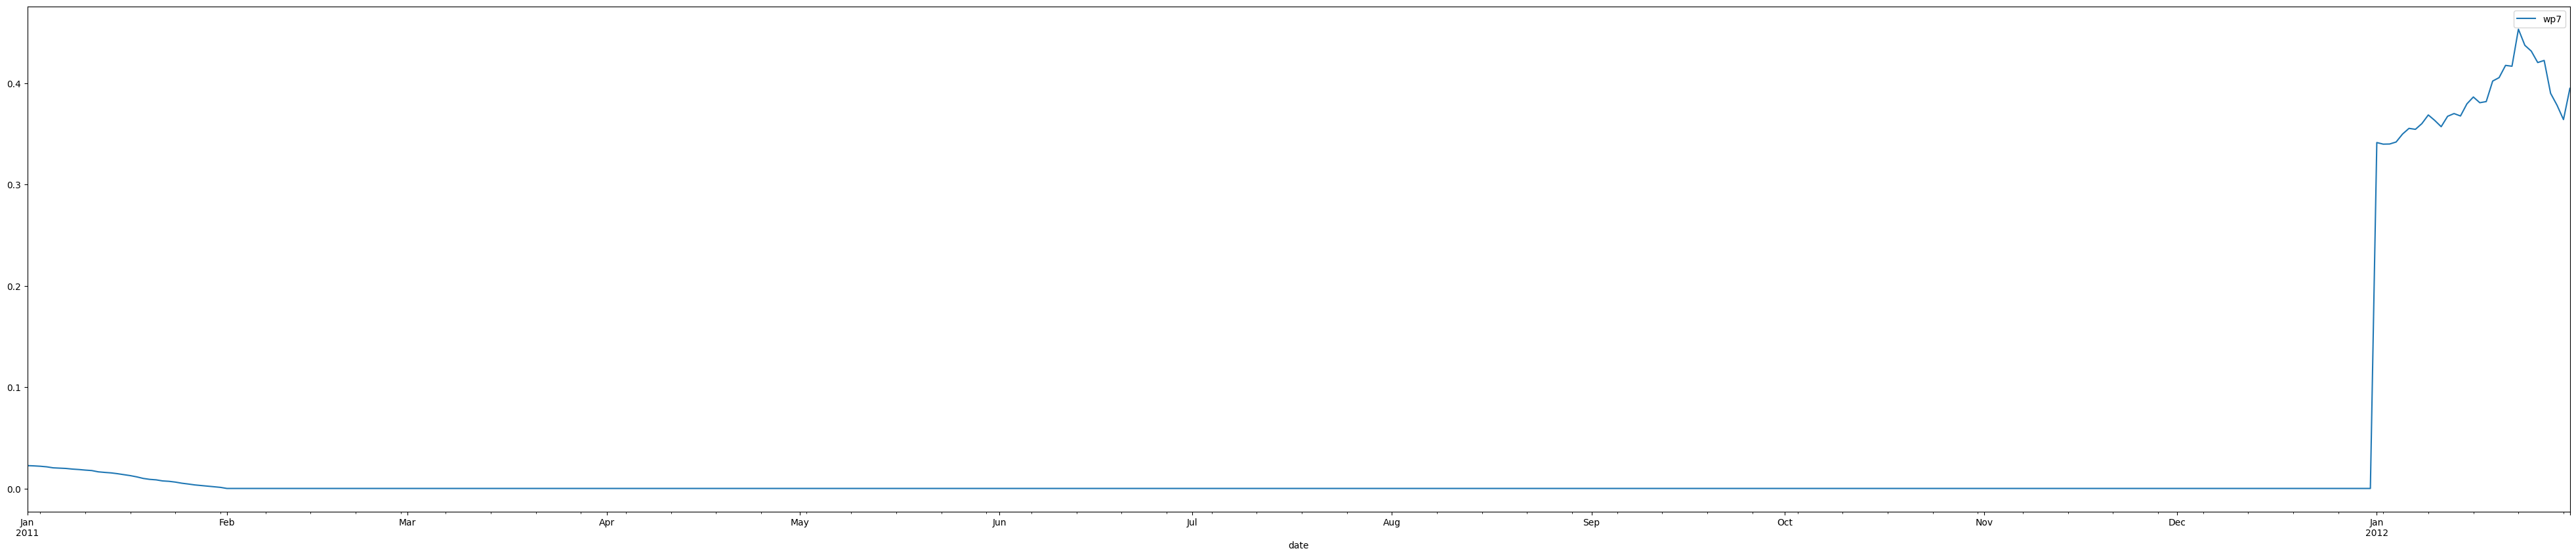

In [516]:
df_pred[['date','wp7']].set_index('date').plot()

In [522]:
df_pred.to_csv('/content/submission/submission.csv')

In [520]:
df_pred['id'] = pd.Series(np.arange(1,df_pred.shape[0]+1))

In [521]:
df_pred.tail()

,date,wp1,wp2,wp3,wp4,wp5,wp6,wp7,id
391,2012-01-27,0.323853,0.312788,0.381606,0.381606,0.249307,0.414968,0.422674,392
392,2012-01-28,0.291883,0.275178,0.352272,0.352272,0.214728,0.384343,0.390203,393
393,2012-01-29,0.273669,0.243147,0.338526,0.338526,0.186642,0.368072,0.378444,394
394,2012-01-30,0.222578,0.320631,0.294614,0.294614,0.102527,0.331437,0.364285,395
395,2012-01-31,0.198110,0.253833,0.320593,0.320593,0.103592,0.357956,0.395120,396
